In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import random
import math
from tensorflow.keras.callbacks import TensorBoard
from sklearn.preprocessing import StandardScaler
from keras.regularizers import l1, l2
from keras.regularizers import l1_l2
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
FF_df = pd.read_csv('form_factors.csv')
TD_x_df = pd.read_csv('gpr_total_density_x_200.csv')
TD_y_df = pd.read_csv('gpr_total_density_y_200.csv')

FF_df = FF_df.transpose()
TD_x_df = TD_x_df.transpose()
TD_y_df = TD_y_df.transpose()

FF_df = (FF_df-FF_df.mean())/FF_df.std()
TD_x_df = (TD_x_df-TD_x_df.mean())/TD_x_df.std()
TD_y_df = (TD_y_df-TD_y_df.mean())/TD_y_df.std()

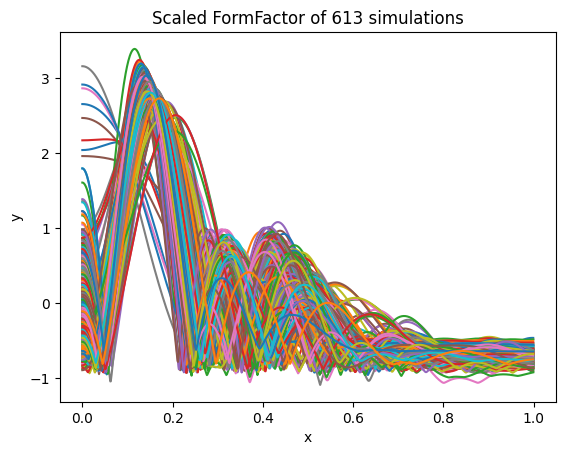

In [16]:
for i in FF_df.columns:
    plt.plot(np.arange(0,1,0.001), FF_df[i])

plt.xlabel('x')
plt.ylabel('y')
plt.title('Scaled FormFactor of 613 simulations')
plt.show()

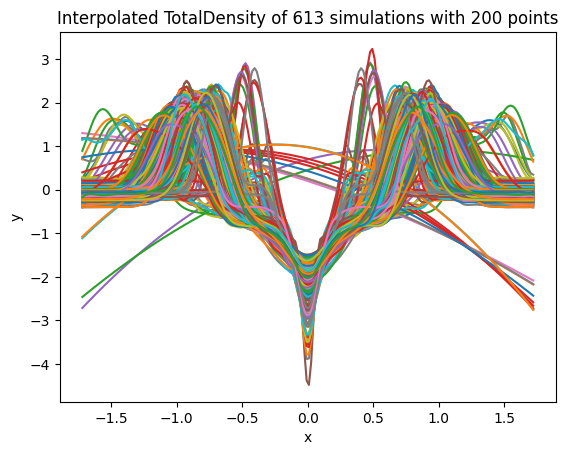

In [6]:
for index in TD_x_df.columns:
    plt.plot(TD_x_df[index],TD_y_df[index])
    
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolated TotalDensity of 613 simulations with 200 points')
plt.show()

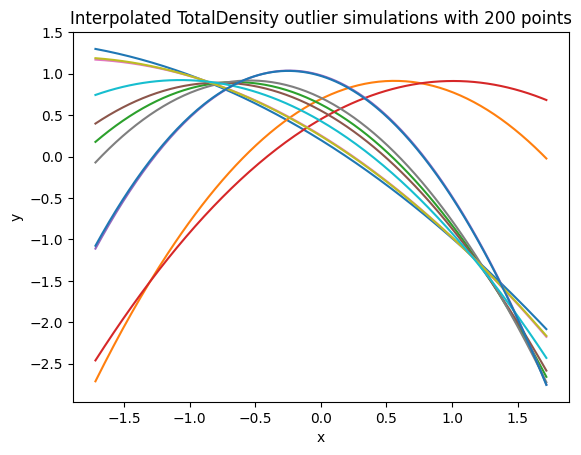

In [3]:
column_indexes = []
index = 0
for value in TD_y_df.iloc[99]:
    if value > -1:
        column_indexes.append(index)
    index = index + 1
    
for index in column_indexes:
    plt.plot(TD_x_df[index],TD_y_df[index])
    
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolated TotalDensity outlier simulations with 200 points')
plt.show()

In [4]:
FF_df = FF_df.drop(column_indexes, axis=1)
TD_x_df = TD_x_df.drop(column_indexes, axis=1)
TD_y_df = TD_y_df.drop(column_indexes, axis=1)

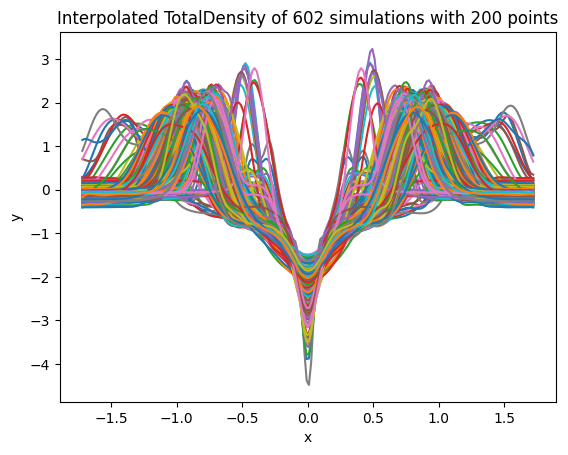

In [32]:
for index in TD_x_df.columns:
    plt.plot(TD_x_df[index],TD_y_df[index])
    
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolated TotalDensity of 602 simulations with 200 points')
plt.show()

In [13]:
FF_df

0         1         2         3         4         5         6    \
0    0.980720 -0.444256  0.186761 -0.047851 -0.354703 -0.584007 -0.183981   
1    0.980030 -0.444704  0.186284 -0.048252 -0.355220 -0.584411 -0.183635   
2    0.977961 -0.446046  0.184852 -0.049453 -0.356769 -0.585624 -0.182598   
3    0.974512 -0.448282  0.182466 -0.051454 -0.359351 -0.587644 -0.180870   
4    0.969687 -0.451412  0.179127 -0.054255 -0.362964 -0.590472 -0.178453   
..        ...       ...       ...       ...       ...       ...       ...   
995 -0.637919 -0.763000 -0.775248 -0.745377 -0.664294 -0.757084 -0.752626   
996 -0.637355 -0.762537 -0.774302 -0.744959 -0.665308 -0.758153 -0.751415   
997 -0.636854 -0.762078 -0.773360 -0.744537 -0.666345 -0.759220 -0.750233   
998 -0.636415 -0.761626 -0.772425 -0.744112 -0.667403 -0.760285 -0.749080   
999 -0.636038 -0.761180 -0.771495 -0.743684 -0.668483 -0.761346 -0.747956   

          7         8         9    ...       603       604       605  \
0   -0.309006 -0.349255  0.267737  ... -0.513892 -0.299718 -0.477219   
1   -0.309460 -0.349860  0.267305  ... -0.514353 -0.299953 -0.477644   
2   -0.310820 -0.351675  0.266009  ... -0.515734 -0.300657 -0.478919   
3   -0.313086 -0.354698  0.263851  ... -0.518037 -0.301829 -0.481043   
4   -0.316257 -0.358928  0.260830  ... -0.521258 -0.303470 -0.484016   
..        ...       ...       ...  ...       ...       ...       ...   
995 -0.656961 -0.656225 -0.777161  ... -0.857844 -0.764482 -0.705293   
996 -0.656542 -0.659345 -0.777468  ... -0.857907 -0.765611 -0.704952   
997 -0.656158 -0.662494 -0.777772  ... -0.857928 -0.766756 -0.704615   
998 -0.655810 -0.665672 -0.778070  ... -0.857907 -0.767919 -0.704282   
999 -0.655498 -0.668877 -0.778360  ... -0.857847 -0.769097 -0.703954   

          606       607       608       609       610       611       612  
0    0.087297 -0.142115  0.840006 -0.459976 -0.427894  0.672328 -0.105556  
1    0.086667 -0.142717  0.839384 -0.460461 -0.428323  0.671703 -0.105924  
2    0.084776 -0.144520  0.837520 -0.461915 -0.429612  0.669829 -0.107030  
3    0.081625 -0.147525  0.834413 -0.464338 -0.431758  0.666705 -0.108872  
4    0.077216 -0.151730  0.830066 -0.467729 -0.434762  0.662335 -0.111451  
..        ...       ...       ...       ...       ...       ...       ...  
995 -0.861659 -0.689449 -0.738946 -0.677948 -0.761120 -0.640692 -0.750145  
996 -0.862931 -0.690513 -0.738721 -0.677956 -0.760901 -0.640672 -0.749707  
997 -0.864157 -0.691557 -0.738505 -0.678050 -0.760640 -0.640653 -0.749303  
998 -0.865337 -0.692583 -0.738300 -0.678230 -0.760337 -0.640635 -0.748932  
999 -0.866470 -0.693590 -0.738105 -0.678494 -0.759994 -0.640617 -0.748596  

[1000 rows x 602 columns]

In [14]:
TD_x_df

0         1         2         3         4         5         6    \
0   -1.719098 -1.719098 -1.719098 -1.719098 -1.719098 -1.719098 -1.719098   
1   -1.701821 -1.701821 -1.701821 -1.701821 -1.701821 -1.701821 -1.701821   
2   -1.684543 -1.684543 -1.684543 -1.684543 -1.684543 -1.684543 -1.684543   
3   -1.667266 -1.667266 -1.667266 -1.667266 -1.667266 -1.667266 -1.667266   
4   -1.649989 -1.649989 -1.649989 -1.649989 -1.649989 -1.649989 -1.649989   
..        ...       ...       ...       ...       ...       ...       ...   
195  1.649989  1.649989  1.649989  1.649989  1.649989  1.649989  1.649989   
196  1.667266  1.667266  1.667266  1.667266  1.667266  1.667266  1.667266   
197  1.684543  1.684543  1.684543  1.684543  1.684543  1.684543  1.684543   
198  1.701821  1.701821  1.701821  1.701821  1.701821  1.701821  1.701821   
199  1.719098  1.719098  1.719098  1.719098  1.719098  1.719098  1.719098   

          7         8         9    ...       603       604       605  \
0   -1.719098 -1.719098 -1.719098  ... -1.719098 -1.719098 -1.719098   
1   -1.701821 -1.701821 -1.701821  ... -1.701821 -1.701821 -1.701821   
2   -1.684543 -1.684543 -1.684543  ... -1.684543 -1.684543 -1.684543   
3   -1.667266 -1.667266 -1.667266  ... -1.667266 -1.667266 -1.667266   
4   -1.649989 -1.649989 -1.649989  ... -1.649989 -1.649989 -1.649989   
..        ...       ...       ...  ...       ...       ...       ...   
195  1.649989  1.649989  1.649989  ...  1.649989  1.649989  1.649989   
196  1.667266  1.667266  1.667266  ...  1.667266  1.667266  1.667266   
197  1.684543  1.684543  1.684543  ...  1.684543  1.684543  1.684543   
198  1.701821  1.701821  1.701821  ...  1.701821  1.701821  1.701821   
199  1.719098  1.719098  1.719098  ...  1.719098  1.719098  1.719098   

          606       607       608       609       610       611       612  
0   -1.719098 -1.719098 -1.719098 -1.719098 -1.719098 -1.719098 -1.719098  
1   -1.701821 -1.701821 -1.701821 -1.701821 -1.701821 -1.701821 -1.701821  
2   -1.684543 -1.684543 -1.684543 -1.684543 -1.684543 -1.684543 -1.684543  
3   -1.667266 -1.667266 -1.667266 -1.667266 -1.667266 -1.667266 -1.667266  
4   -1.649989 -1.649989 -1.649989 -1.649989 -1.649989 -1.649989 -1.649989  
..        ...       ...       ...       ...       ...       ...       ...  
195  1.649989  1.649989  1.649989  1.649989  1.649989  1.649989  1.649989  
196  1.667266  1.667266  1.667266  1.667266  1.667266  1.667266  1.667266  
197  1.684543  1.684543  1.684543  1.684543  1.684543  1.684543  1.684543  
198  1.701821  1.701821  1.701821  1.701821  1.701821  1.701821  1.701821  
199  1.719098  1.719098  1.719098  1.719098  1.719098  1.719098  1.719098  

[200 rows x 602 columns]

In [15]:
TD_y_df

0         1         2         3         4         5         6    \
0   -0.292967 -0.043943 -0.158113 -0.101767 -0.074313 -0.015691  0.130820   
1   -0.287719 -0.048955 -0.158903 -0.108930 -0.065830 -0.027563  0.116175   
2   -0.285331 -0.054403 -0.159960 -0.112849 -0.062805 -0.033899  0.110771   
3   -0.284011 -0.057850 -0.160734 -0.114323 -0.062832 -0.036013  0.111254   
4   -0.283050 -0.058699 -0.161087 -0.114178 -0.064223 -0.035278  0.114579   
..        ...       ...       ...       ...       ...       ...       ...   
195 -0.284641 -0.058231 -0.159933 -0.114170 -0.065815 -0.040228  0.110020   
196 -0.285351 -0.056702 -0.158876 -0.114536 -0.064869 -0.039316  0.107380   
197 -0.286225 -0.055992 -0.158280 -0.115670 -0.063731 -0.035067  0.103959   
198 -0.288039 -0.057726 -0.159393 -0.117792 -0.063152 -0.025993  0.099929   
199 -0.292285 -0.064301 -0.164136 -0.121192 -0.064547 -0.010529  0.095253   

          7         8         9    ...       603       604       605  \
0   -0.081422 -0.077652 -0.176547  ... -0.055277 -0.100642 -0.038685   
1   -0.081356 -0.076761 -0.174650  ... -0.045650 -0.097157 -0.037322   
2   -0.082830 -0.074020 -0.173992  ... -0.044475 -0.097230 -0.037047   
3   -0.084084 -0.071692 -0.173963  ... -0.047638 -0.100022 -0.037256   
4   -0.084358 -0.070750 -0.174172  ... -0.051569 -0.104700 -0.037584   
..        ...       ...       ...  ...       ...       ...       ...   
195 -0.085534 -0.071605 -0.173548  ... -0.054341 -0.099677 -0.037964   
196 -0.088656 -0.073382 -0.173128  ... -0.051663 -0.095382 -0.038246   
197 -0.089890 -0.076052 -0.173129  ... -0.051372 -0.093211 -0.038337   
198 -0.087382 -0.079193 -0.173866  ... -0.056617 -0.094425 -0.037948   
199 -0.079401 -0.081836 -0.175784  ... -0.072725 -0.100615 -0.036756   

          606       607       608       609       610       611       612  
0   -0.145616 -0.091428 -0.245502 -0.061689 -0.065606 -0.220929 -0.171157  
1   -0.147582 -0.080542 -0.245715 -0.050817 -0.060005 -0.218079 -0.128594  
2   -0.148528 -0.080141 -0.246071 -0.053721 -0.057062 -0.216923 -0.104758  
3   -0.147606 -0.082219 -0.246198 -0.060734 -0.055632 -0.216739 -0.095096  
4   -0.145384 -0.083096 -0.246001 -0.066050 -0.055196 -0.216993 -0.095194  
..        ...       ...       ...       ...       ...       ...       ...  
195 -0.144443 -0.080849 -0.246660 -0.048337 -0.057925 -0.217384 -0.111441  
196 -0.143589 -0.076135 -0.246312 -0.048564 -0.064769 -0.216985 -0.107901  
197 -0.142992 -0.073838 -0.246020 -0.052194 -0.069580 -0.216915 -0.105345  
198 -0.144643 -0.080083 -0.246297 -0.061096 -0.068880 -0.217690 -0.105507  
199 -0.152251 -0.103521 -0.248100 -0.078233 -0.059392 -0.220034 -0.110609  

[200 rows x 602 columns]

In [5]:
names = []
for i in TD_x_df.columns:
    names.append(str(i) + 'x')
    names.append(str(i) + 'y')

TD_df = pd.DataFrame(index=range(200),columns=[names])

for i in TD_x_df.columns:
    x_value = []
    y_value = []
    for value in TD_x_df[i]:
        x_value.append(value)
    for value in TD_y_df[i]:
        y_value.append(value)
    
    TD_df[str(i) + 'x'] = x_value
    TD_df[str(i) + 'y'] = y_value
    
TD_df

0x        0y        1x        1y        2x        2y        3x  \
0   -1.719098 -0.292967 -1.719098 -0.043943 -1.719098 -0.158113 -1.719098   
1   -1.701821 -0.287719 -1.701821 -0.048955 -1.701821 -0.158903 -1.701821   
2   -1.684543 -0.285331 -1.684543 -0.054403 -1.684543 -0.159960 -1.684543   
3   -1.667266 -0.284011 -1.667266 -0.057850 -1.667266 -0.160734 -1.667266   
4   -1.649989 -0.283050 -1.649989 -0.058699 -1.649989 -0.161087 -1.649989   
..        ...       ...       ...       ...       ...       ...       ...   
195  1.649989 -0.284641  1.649989 -0.058231  1.649989 -0.159933  1.649989   
196  1.667266 -0.285351  1.667266 -0.056702  1.667266 -0.158876  1.667266   
197  1.684543 -0.286225  1.684543 -0.055992  1.684543 -0.158280  1.684543   
198  1.701821 -0.288039  1.701821 -0.057726  1.701821 -0.159393  1.701821   
199  1.719098 -0.292285  1.719098 -0.064301  1.719098 -0.164136  1.719098   

           3y        4x        4y  ...      608x      608y      609x  \
0   -0.101767 -1.719098 -0.074313  ... -1.719098 -0.245502 -1.719098   
1   -0.108930 -1.701821 -0.065830  ... -1.701821 -0.245715 -1.701821   
2   -0.112849 -1.684543 -0.062805  ... -1.684543 -0.246071 -1.684543   
3   -0.114323 -1.667266 -0.062832  ... -1.667266 -0.246198 -1.667266   
4   -0.114178 -1.649989 -0.064223  ... -1.649989 -0.246001 -1.649989   
..        ...       ...       ...  ...       ...       ...       ...   
195 -0.114170  1.649989 -0.065815  ...  1.649989 -0.246660  1.649989   
196 -0.114536  1.667266 -0.064869  ...  1.667266 -0.246312  1.667266   
197 -0.115670  1.684543 -0.063731  ...  1.684543 -0.246020  1.684543   
198 -0.117792  1.701821 -0.063152  ...  1.701821 -0.246297  1.701821   
199 -0.121192  1.719098 -0.064547  ...  1.719098 -0.248100  1.719098   

         609y      610x      610y      611x      611y      612x      612y  
0   -0.061689 -1.719098 -0.065606 -1.719098 -0.220929 -1.719098 -0.171157  
1   -0.050817 -1.701821 -0.060005 -1.701821 -0.218079 -1.701821 -0.128594  
2   -0.053721 -1.684543 -0.057062 -1.684543 -0.216923 -1.684543 -0.104758  
3   -0.060734 -1.667266 -0.055632 -1.667266 -0.216739 -1.667266 -0.095096  
4   -0.066050 -1.649989 -0.055196 -1.649989 -0.216993 -1.649989 -0.095194  
..        ...       ...       ...       ...       ...       ...       ...  
195 -0.048337  1.649989 -0.057925  1.649989 -0.217384  1.649989 -0.111441  
196 -0.048564  1.667266 -0.064769  1.667266 -0.216985  1.667266 -0.107901  
197 -0.052194  1.684543 -0.069580  1.684543 -0.216915  1.684543 -0.105345  
198 -0.061096  1.701821 -0.068880  1.701821 -0.217690  1.701821 -0.105507  
199 -0.078233  1.719098 -0.059392  1.719098 -0.220034  1.719098 -0.110609  

[200 rows x 1204 columns]

In [6]:
input_data = FF_df.iloc[: , :-2]
output_data = TD_df.iloc[: , :-4]

In [20]:
input_data

0         1         2         3         4         5         6    \
0    0.980720 -0.444256  0.186761 -0.047851 -0.354703 -0.584007 -0.183981   
1    0.980030 -0.444704  0.186284 -0.048252 -0.355220 -0.584411 -0.183635   
2    0.977961 -0.446046  0.184852 -0.049453 -0.356769 -0.585624 -0.182598   
3    0.974512 -0.448282  0.182466 -0.051454 -0.359351 -0.587644 -0.180870   
4    0.969687 -0.451412  0.179127 -0.054255 -0.362964 -0.590472 -0.178453   
..        ...       ...       ...       ...       ...       ...       ...   
995 -0.637919 -0.763000 -0.775248 -0.745377 -0.664294 -0.757084 -0.752626   
996 -0.637355 -0.762537 -0.774302 -0.744959 -0.665308 -0.758153 -0.751415   
997 -0.636854 -0.762078 -0.773360 -0.744537 -0.666345 -0.759220 -0.750233   
998 -0.636415 -0.761626 -0.772425 -0.744112 -0.667403 -0.760285 -0.749080   
999 -0.636038 -0.761180 -0.771495 -0.743684 -0.668483 -0.761346 -0.747956   

          7         8         9    ...       601       602       603  \
0   -0.309006 -0.349255  0.267737  ... -0.670520 -0.250014 -0.513892   
1   -0.309460 -0.349860  0.267305  ... -0.670950 -0.250566 -0.514353   
2   -0.310820 -0.351675  0.266009  ... -0.672240 -0.252221 -0.515734   
3   -0.313086 -0.354698  0.263851  ... -0.674390 -0.254978 -0.518037   
4   -0.316257 -0.358928  0.260830  ... -0.677398 -0.258837 -0.521258   
..        ...       ...       ...  ...       ...       ...       ...   
995 -0.656961 -0.656225 -0.777161  ... -0.743381 -0.669381 -0.857844   
996 -0.656542 -0.659345 -0.777468  ... -0.743575 -0.669735 -0.857907   
997 -0.656158 -0.662494 -0.777772  ... -0.743771 -0.670089 -0.857928   
998 -0.655810 -0.665672 -0.778070  ... -0.743970 -0.670442 -0.857907   
999 -0.655498 -0.668877 -0.778360  ... -0.744172 -0.670794 -0.857847   

          604       605       606       607       608       609       610  
0   -0.299718 -0.477219  0.087297 -0.142115  0.840006 -0.459976 -0.427894  
1   -0.299953 -0.477644  0.086667 -0.142717  0.839384 -0.460461 -0.428323  
2   -0.300657 -0.478919  0.084776 -0.144520  0.837520 -0.461915 -0.429612  
3   -0.301829 -0.481043  0.081625 -0.147525  0.834413 -0.464338 -0.431758  
4   -0.303470 -0.484016  0.077216 -0.151730  0.830066 -0.467729 -0.434762  
..        ...       ...       ...       ...       ...       ...       ...  
995 -0.764482 -0.705293 -0.861659 -0.689449 -0.738946 -0.677948 -0.761120  
996 -0.765611 -0.704952 -0.862931 -0.690513 -0.738721 -0.677956 -0.760901  
997 -0.766756 -0.704615 -0.864157 -0.691557 -0.738505 -0.678050 -0.760640  
998 -0.767919 -0.704282 -0.865337 -0.692583 -0.738300 -0.678230 -0.760337  
999 -0.769097 -0.703954 -0.866470 -0.693590 -0.738105 -0.678494 -0.759994  

[1000 rows x 600 columns]

In [21]:
output_data

0x        0y        1x        1y        2x        2y        3x  \
0   -1.719098 -0.292967 -1.719098 -0.043943 -1.719098 -0.158113 -1.719098   
1   -1.701821 -0.287719 -1.701821 -0.048955 -1.701821 -0.158903 -1.701821   
2   -1.684543 -0.285331 -1.684543 -0.054403 -1.684543 -0.159960 -1.684543   
3   -1.667266 -0.284011 -1.667266 -0.057850 -1.667266 -0.160734 -1.667266   
4   -1.649989 -0.283050 -1.649989 -0.058699 -1.649989 -0.161087 -1.649989   
..        ...       ...       ...       ...       ...       ...       ...   
195  1.649989 -0.284641  1.649989 -0.058231  1.649989 -0.159933  1.649989   
196  1.667266 -0.285351  1.667266 -0.056702  1.667266 -0.158876  1.667266   
197  1.684543 -0.286225  1.684543 -0.055992  1.684543 -0.158280  1.684543   
198  1.701821 -0.288039  1.701821 -0.057726  1.701821 -0.159393  1.701821   
199  1.719098 -0.292285  1.719098 -0.064301  1.719098 -0.164136  1.719098   

           3y        4x        4y  ...      606x      606y      607x  \
0   -0.101767 -1.719098 -0.074313  ... -1.719098 -0.145616 -1.719098   
1   -0.108930 -1.701821 -0.065830  ... -1.701821 -0.147582 -1.701821   
2   -0.112849 -1.684543 -0.062805  ... -1.684543 -0.148528 -1.684543   
3   -0.114323 -1.667266 -0.062832  ... -1.667266 -0.147606 -1.667266   
4   -0.114178 -1.649989 -0.064223  ... -1.649989 -0.145384 -1.649989   
..        ...       ...       ...  ...       ...       ...       ...   
195 -0.114170  1.649989 -0.065815  ...  1.649989 -0.144443  1.649989   
196 -0.114536  1.667266 -0.064869  ...  1.667266 -0.143589  1.667266   
197 -0.115670  1.684543 -0.063731  ...  1.684543 -0.142992  1.684543   
198 -0.117792  1.701821 -0.063152  ...  1.701821 -0.144643  1.701821   
199 -0.121192  1.719098 -0.064547  ...  1.719098 -0.152251  1.719098   

         607y      608x      608y      609x      609y      610x      610y  
0   -0.091428 -1.719098 -0.245502 -1.719098 -0.061689 -1.719098 -0.065606  
1   -0.080542 -1.701821 -0.245715 -1.701821 -0.050817 -1.701821 -0.060005  
2   -0.080141 -1.684543 -0.246071 -1.684543 -0.053721 -1.684543 -0.057062  
3   -0.082219 -1.667266 -0.246198 -1.667266 -0.060734 -1.667266 -0.055632  
4   -0.083096 -1.649989 -0.246001 -1.649989 -0.066050 -1.649989 -0.055196  
..        ...       ...       ...       ...       ...       ...       ...  
195 -0.080849  1.649989 -0.246660  1.649989 -0.048337  1.649989 -0.057925  
196 -0.076135  1.667266 -0.246312  1.667266 -0.048564  1.667266 -0.064769  
197 -0.073838  1.684543 -0.246020  1.684543 -0.052194  1.684543 -0.069580  
198 -0.080083  1.701821 -0.246297  1.701821 -0.061096  1.701821 -0.068880  
199 -0.103521  1.719098 -0.248100  1.719098 -0.078233  1.719098 -0.059392  

[200 rows x 1200 columns]

In [7]:
column_index = []
for i in input_data.columns:
    column_index.append(i)

random.seed(42)
train = random.sample(column_index,488)
test = []
for number in column_index:
    if not number in train:
        test.append(number)

print(train)
print(test)

[119, 27, 286, 255, 233, 147, 109, 569, 94, 442, 34, 32, 100, 228, 243, 527, 29, 585, 208, 603, 439, 230, 469, 289, 6, 168, 601, 356, 587, 164, 225, 351, 604, 99, 398, 104, 375, 360, 275, 47, 480, 560, 132, 396, 84, 306, 378, 201, 74, 49, 238, 301, 85, 596, 108, 576, 582, 474, 381, 171, 388, 371, 219, 278, 76, 180, 607, 172, 483, 397, 281, 229, 339, 60, 239, 600, 330, 419, 279, 70, 221, 329, 222, 521, 414, 479, 151, 276, 605, 131, 390, 292, 280, 139, 391, 305, 224, 588, 304, 209, 190, 117, 73, 265, 257, 561, 395, 26, 450, 59, 81, 328, 558, 525, 583, 529, 312, 534, 202, 200, 493, 244, 572, 133, 288, 501, 5, 495, 377, 61, 357, 463, 531, 393, 141, 402, 335, 179, 536, 155, 227, 566, 237, 1, 481, 458, 376, 516, 261, 399, 96, 264, 57, 455, 327, 157, 440, 334, 464, 318, 106, 499, 196, 460, 86, 539, 407, 522, 0, 313, 170, 543, 9, 471, 509, 422, 162, 127, 31, 128, 295, 42, 46, 382, 253, 37, 555, 277, 401, 67, 68, 344, 248, 608, 88, 140, 487, 317, 494, 113, 444, 503, 552, 361, 107, 373, 581, 510

In [8]:
train_input_values = []
for number in train:
    train_input_values.append(input_data[number])
    
train_output_values = []
for number in train:
    list_1 = output_data[str(number) + 'x']
    list_2 = output_data[str(number) + 'y']
    train_output_values.append(np.concatenate((list_1,list_2)))

test_input_values = []
for number in test:
    test_input_values.append(input_data[number])
    
test_output_values = []
for number in test:
    list_1 = output_data[str(number) + 'x']
    list_2 = output_data[str(number) + 'y']
    test_output_values.append(np.concatenate((list_1,list_2)))
    
train_input_values = np.array(train_input_values).astype(np.float32)
train_output_values = np.array(train_output_values).astype(np.float32)
test_input_values = np.array(test_input_values).astype(np.float32)
test_output_values = np.array(test_output_values).astype(np.float32)

In [9]:
print(train_input_values.shape)
print(train_output_values.shape)
print(test_input_values.shape)
print(test_output_values.shape)

(488, 1000)
(488, 400, 1)
(112, 1000)
(112, 400, 1)


In [10]:
def Loss(actual,prediction):
    length = int(len(prediction[0])/2)
    
    index = 0
    distance_average_sum = 0
    for data in prediction:
        p_x = data[0:length]
        p_y = data[length:]
        t_x = actual[index][0:length]
        t_y = actual[index][length:]
         
        distance_sum = 0
        for i in range(0,length):
            distance_sum = distance_sum + math.sqrt((t_x[i]-p_x[i])**2 + (t_y[i]-p_y[i])**2)
            
        distance_average_sum = distance_average_sum + distance_sum/length
        index = index + 1
        
    return (distance_average_sum)/len(prediction)

def test_loss(actual,prediction):
    row_length = int(np.shape(actual)[1]/2)
    column_length = int(np.shape(actual)[0])
    
    p_x = np.array(prediction)[:,0:row_length]
    p_y = np.array(prediction)[:,row_length:]
    t_x = np.array(actual)[:,0:row_length]
    t_y = np.array(actual)[:,row_length:]
    
    distance_squared = (t_x - p_x)**2 + (t_y - p_y)**2
    distance = np.sqrt(distance_squared)
    distance_sum = np.sum(distance, axis=1)
    distance_average = np.mean(distance_sum)
    
    return distance_average / column_length
      
def training_loss(true, pred):
    row_length = int(tf.shape(true)[1]/2)
    column_length = int(tf.shape(true)[0])
    
    p_x = tf.cast(pred[:, 0:row_length], tf.float32)
    p_y = tf.cast(pred[:, row_length:], tf.float32)
    t_x = tf.cast(true[:, 0:row_length], tf.float32)
    t_y = tf.cast(true[:, row_length:], tf.float32)
    
    distance_squared = (t_x - p_x)**2 + (t_y - p_y)**2
    distance = tf.sqrt(distance_squared)
    distance_sum = tf.reduce_sum(distance, axis=-1)
    distance_average = tf.reduce_mean(distance_sum)
    
    return distance_average / tf.cast(tf.shape(true)[0], tf.float32)

In [112]:
true = [[1,2,3,4,5,6],[1,2,3,4,5,6],[1,2,3,4,5,6]]
pred = [[1,2,5,3,5,5],[1,10,2,4,4,6],[1,1,4,7,5,6]]
print(Loss(true,pred))
print(test_loss(true, pred))
print(custom_loss(tf.constant(true), tf.constant(pred)))

1.9220361917553712
1.922036191755371
tf.Tensor(1.922036, shape=(), dtype=float32)


In [11]:
def test_loss(actual,prediction):
    row_length = int(np.shape(actual)[1]/2)
    column_length = int(np.shape(actual)[0])
    
    p_x = np.array(prediction)[:,0:row_length]
    p_y = np.array(prediction)[:,row_length:]
    t_x = np.array(actual)[:,0:row_length]
    t_y = np.array(actual)[:,row_length:]
    
    distance_squared = (t_x - p_x)**2 + (t_y - p_y)**2
    distance = np.sqrt(distance_squared)
    distance_sum = np.sum(distance, axis=1)
    distance_average = np.mean(distance_sum)
    
    return distance_average / column_length

def plots(actual,prediction):
    random.seed(42)
    train = random.sample(range(0,len(test_input_values)),10)
    for number in train:
        length = int(len(prediction[0])/2)
        x_1 = prediction[number][0:length]
        y_1 = prediction[number][length:]
        plt.plot(x_1,y_1,c='b')

        x_2 = test_output_values[number][0:length]
        y_2 = test_output_values[number][length:]
        plt.plot(x_2,y_2,c='r')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Output curve of the ten random predictions |blue| against actual |red|')
    plt.show() 
    
    index = 0
    for points in prediction:
        p_x = points[0:length]
        p_y = points[length:]
        plt.scatter(p_x,p_y,c='b', label='Prediction', alpha=0.25)
        t_x = test_output_values[index][0:length].tolist()
        t_y = test_output_values[index][length:].tolist()
        plt.scatter(t_x,t_y,c='r', label = 'Actual', alpha=0.50)
        index = index + 1

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Output scatterplot of prediction |blue| and actual |red| data')
    plt.show()
    
def training_loss(true, pred):
    row_length = int(tf.shape(true)[1]/2)
    column_length = int(tf.shape(true)[0])
    
    p_x = tf.cast(pred[:, 0:row_length], tf.float32)
    p_y = tf.cast(pred[:, row_length:], tf.float32)
    t_x = tf.cast(true[:, 0:row_length], tf.float32)
    t_y = tf.cast(true[:, row_length:], tf.float32)
    
    distance_squared = (t_x - p_x)**2 + (t_y - p_y)**2
    distance = tf.sqrt(distance_squared)
    distance_sum = tf.reduce_sum(distance, axis=-1)
    distance_average = tf.reduce_mean(distance_sum)
    
    return distance_average / tf.cast(tf.shape(true)[0], tf.float32)

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 1000)]            0         
                                                                 
 dense_24 (Dense)            (None, 2000)              2002000   
                                                                 
 dense_25 (Dense)            (None, 1000)              2001000   
                                                                 
 dense_26 (Dense)            (None, 400)               400400    
                                                                 
Total params: 4,403,400
Trainable params: 4,403,400
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
7/7 [==============================] - 2s 208ms/step - loss: 2.8427 - val_loss: 1.9416
Epoch 2/500
7/7 [==============================] - 1s 83ms/step - loss: 2.2668 - v

7/7 [==============================] - 1s 74ms/step - loss: 0.9664 - val_loss: 1.1470
Epoch 157/500
7/7 [==============================] - 0s 72ms/step - loss: 0.9344 - val_loss: 1.2759
Epoch 158/500
7/7 [==============================] - 1s 79ms/step - loss: 0.8597 - val_loss: 1.1655
Epoch 159/500
7/7 [==============================] - 1s 78ms/step - loss: 0.8648 - val_loss: 1.1451
Epoch 160/500
7/7 [==============================] - 1s 75ms/step - loss: 0.8784 - val_loss: 1.1580
Epoch 161/500
7/7 [==============================] - 1s 182ms/step - loss: 0.8974 - val_loss: 1.1703
Epoch 162/500
7/7 [==============================] - 1s 77ms/step - loss: 0.8822 - val_loss: 1.2196
Epoch 163/500
7/7 [==============================] - 0s 73ms/step - loss: 0.9210 - val_loss: 1.1759
Epoch 164/500
7/7 [==============================] - 0s 73ms/step - loss: 0.8448 - val_loss: 1.1129
Epoch 165/500
7/7 [==============================] - 1s 78ms/step - loss: 0.7912 - val_loss: 1.0877
Epoch 166/500

Epoch 238/500
7/7 [==============================] - 1s 74ms/step - loss: 0.8279 - val_loss: 1.1827
Epoch 239/500
7/7 [==============================] - 1s 77ms/step - loss: 0.9308 - val_loss: 1.2739
Epoch 240/500
7/7 [==============================] - 1s 81ms/step - loss: 0.7990 - val_loss: 1.1200
Epoch 241/500
7/7 [==============================] - 1s 181ms/step - loss: 0.7369 - val_loss: 1.0724
Epoch 242/500
7/7 [==============================] - 1s 116ms/step - loss: 0.7595 - val_loss: 1.0933
Epoch 243/500
7/7 [==============================] - 1s 97ms/step - loss: 0.8039 - val_loss: 1.1453
Epoch 244/500
7/7 [==============================] - 1s 74ms/step - loss: 0.7966 - val_loss: 1.1505
Epoch 245/500
7/7 [==============================] - 1s 121ms/step - loss: 0.8062 - val_loss: 1.1904
Epoch 246/500
7/7 [==============================] - 1s 76ms/step - loss: 0.8159 - val_loss: 1.1472
Epoch 247/500
7/7 [==============================] - 1s 74ms/step - loss: 0.8341 - val_loss: 1.20

Epoch 320/500
7/7 [==============================] - 1s 75ms/step - loss: 0.7717 - val_loss: 1.1404
Epoch 321/500
7/7 [==============================] - 1s 169ms/step - loss: 0.8791 - val_loss: 1.2471
Epoch 322/500
7/7 [==============================] - 1s 76ms/step - loss: 0.8635 - val_loss: 1.0867
Epoch 323/500
7/7 [==============================] - 1s 76ms/step - loss: 0.7615 - val_loss: 1.1284
Epoch 324/500
7/7 [==============================] - 1s 75ms/step - loss: 0.7574 - val_loss: 1.1255
Epoch 325/500
7/7 [==============================] - 0s 73ms/step - loss: 0.7888 - val_loss: 1.1055
Epoch 326/500
7/7 [==============================] - 1s 75ms/step - loss: 0.8703 - val_loss: 1.3755
Epoch 327/500
7/7 [==============================] - 1s 80ms/step - loss: 0.8639 - val_loss: 1.1713
Epoch 328/500
7/7 [==============================] - 0s 73ms/step - loss: 0.7286 - val_loss: 1.1163
Epoch 329/500
7/7 [==============================] - 1s 77ms/step - loss: 0.7592 - val_loss: 1.0742

Epoch 402/500
7/7 [==============================] - 1s 75ms/step - loss: 0.7310 - val_loss: 1.0892
Epoch 403/500
7/7 [==============================] - 1s 74ms/step - loss: 0.7615 - val_loss: 1.0932
Epoch 404/500
7/7 [==============================] - 0s 73ms/step - loss: 0.7619 - val_loss: 1.1073
Epoch 405/500
7/7 [==============================] - 1s 77ms/step - loss: 0.7293 - val_loss: 1.0756
Epoch 406/500
7/7 [==============================] - 0s 73ms/step - loss: 0.7326 - val_loss: 1.0974
Epoch 407/500
7/7 [==============================] - 1s 77ms/step - loss: 0.7472 - val_loss: 1.0782
Epoch 408/500
7/7 [==============================] - 1s 75ms/step - loss: 0.7934 - val_loss: 1.1612
Epoch 409/500
7/7 [==============================] - 1s 111ms/step - loss: 0.7472 - val_loss: 1.1084
Epoch 410/500
7/7 [==============================] - 1s 195ms/step - loss: 0.7312 - val_loss: 1.1275
Epoch 411/500
7/7 [==============================] - 1s 167ms/step - loss: 0.7083 - val_loss: 1.07

Epoch 484/500
7/7 [==============================] - 1s 74ms/step - loss: 0.7715 - val_loss: 1.1138
Epoch 485/500
7/7 [==============================] - 1s 75ms/step - loss: 0.7574 - val_loss: 1.0659
Epoch 486/500
7/7 [==============================] - 1s 75ms/step - loss: 0.7631 - val_loss: 1.0463
Epoch 487/500
7/7 [==============================] - 0s 72ms/step - loss: 0.7300 - val_loss: 1.0601
Epoch 488/500
7/7 [==============================] - 1s 75ms/step - loss: 0.8024 - val_loss: 1.1077
Epoch 489/500
7/7 [==============================] - 1s 75ms/step - loss: 0.7956 - val_loss: 1.1913
Epoch 490/500
7/7 [==============================] - 0s 73ms/step - loss: 0.7916 - val_loss: 1.1673
Epoch 491/500
7/7 [==============================] - 1s 175ms/step - loss: 0.7280 - val_loss: 1.1011
Epoch 492/500
7/7 [==============================] - 1s 156ms/step - loss: 0.8393 - val_loss: 1.0887
Epoch 493/500
7/7 [==============================] - 1s 105ms/step - loss: 0.7642 - val_loss: 1.11

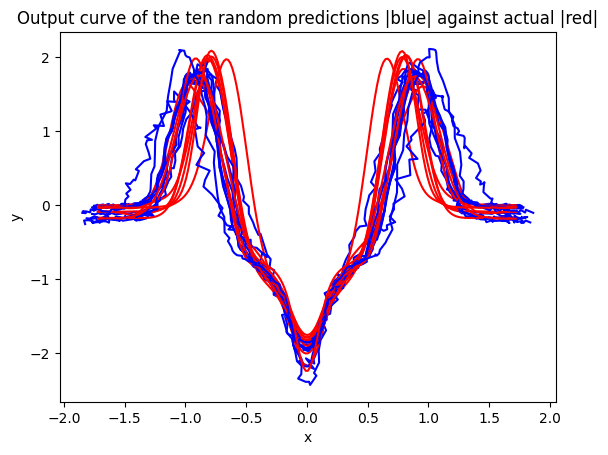

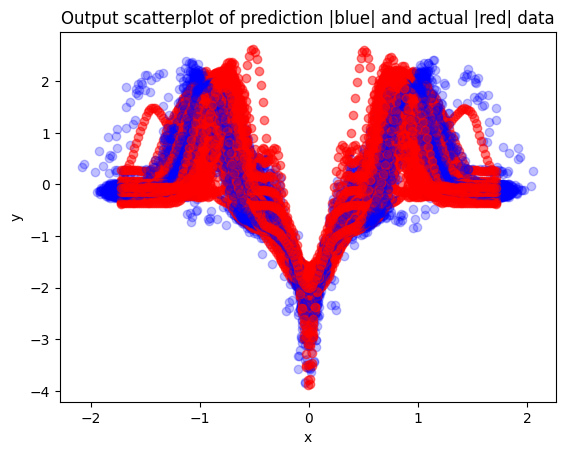

In [118]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(2000, activation="relu")(inputs)
x = layers.Dense(1000, activation="relu")(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss=training_loss)
model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=150),
             TensorBoard(log_dir='model_3_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=64, epochs=500, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(Loss(test_output_values, model.predict(test_input_values))))
print('')
plots(test_output_values,model.predict(test_input_values))

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 1000)]            0         
                                                                 
 dense_27 (Dense)            (None, 2000)              2002000   
                                                                 
 dense_28 (Dense)            (None, 1000)              2001000   
                                                                 
 dense_29 (Dense)            (None, 400)               400400    
                                                                 
Total params: 4,403,400
Trainable params: 4,403,400
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1500
7/7 [==============================] - 2s 228ms/step - loss: 2.8735 - val_loss: 2.0450
Epoch 2/1500
7/7 [==============================] - 1s 90ms/step - loss: 2.3157 -

7/7 [==============================] - 1s 76ms/step - loss: 0.7944 - val_loss: 1.1514
Epoch 155/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.8757 - val_loss: 1.2883
Epoch 156/1500
7/7 [==============================] - 1s 76ms/step - loss: 0.8410 - val_loss: 1.2252
Epoch 157/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.8144 - val_loss: 1.1759
Epoch 158/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.8593 - val_loss: 1.1860
Epoch 159/1500
7/7 [==============================] - 0s 73ms/step - loss: 0.8636 - val_loss: 1.2534
Epoch 160/1500
7/7 [==============================] - 0s 73ms/step - loss: 0.8509 - val_loss: 1.1933
Epoch 161/1500
7/7 [==============================] - 1s 185ms/step - loss: 0.8521 - val_loss: 1.1197
Epoch 162/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.8328 - val_loss: 1.1164
Epoch 163/1500
7/7 [==============================] - 0s 73ms/step - loss: 0.8670 - val_loss: 1.1833
Epoc

7/7 [==============================] - 1s 77ms/step - loss: 0.8714 - val_loss: 1.1114
Epoch 236/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.8468 - val_loss: 1.2008
Epoch 237/1500
7/7 [==============================] - 0s 73ms/step - loss: 0.8329 - val_loss: 1.1666
Epoch 238/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.8007 - val_loss: 1.1372
Epoch 239/1500
7/7 [==============================] - 1s 75ms/step - loss: 0.8098 - val_loss: 1.2212
Epoch 240/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.8130 - val_loss: 1.1855
Epoch 241/1500
7/7 [==============================] - 1s 183ms/step - loss: 0.8089 - val_loss: 1.1595
Epoch 242/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.8392 - val_loss: 1.2043
Epoch 243/1500
7/7 [==============================] - 1s 76ms/step - loss: 0.7691 - val_loss: 1.1448
Epoch 244/1500
7/7 [==============================] - 1s 78ms/step - loss: 0.7944 - val_loss: 1.1051
Epoc

7/7 [==============================] - 1s 76ms/step - loss: 0.7872 - val_loss: 1.1297
Epoch 317/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.8646 - val_loss: 1.2231
Epoch 318/1500
7/7 [==============================] - 0s 73ms/step - loss: 0.7592 - val_loss: 1.1236
Epoch 319/1500
7/7 [==============================] - 1s 87ms/step - loss: 0.7468 - val_loss: 1.0832
Epoch 320/1500
7/7 [==============================] - 1s 75ms/step - loss: 0.7139 - val_loss: 1.0509
Epoch 321/1500
7/7 [==============================] - 1s 170ms/step - loss: 0.7394 - val_loss: 1.1440
Epoch 322/1500
7/7 [==============================] - 1s 76ms/step - loss: 0.7996 - val_loss: 1.1270
Epoch 323/1500
7/7 [==============================] - 1s 75ms/step - loss: 0.7652 - val_loss: 1.1644
Epoch 324/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.8185 - val_loss: 1.1370
Epoch 325/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.7922 - val_loss: 1.1558
Epoc

Epoch 478/1500
7/7 [==============================] - 1s 75ms/step - loss: 0.8045 - val_loss: 1.1216
Epoch 479/1500
7/7 [==============================] - 1s 78ms/step - loss: 0.7912 - val_loss: 1.1273
Epoch 480/1500
7/7 [==============================] - 0s 72ms/step - loss: 0.7903 - val_loss: 1.1344
Epoch 481/1500
7/7 [==============================] - 1s 175ms/step - loss: 0.7817 - val_loss: 1.1299
Epoch 482/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.7175 - val_loss: 1.1149
Epoch 483/1500
7/7 [==============================] - 1s 75ms/step - loss: 0.7200 - val_loss: 1.0682
Epoch 484/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.7411 - val_loss: 1.0600
Epoch 485/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.6723 - val_loss: 1.0392
Epoch 486/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.7300 - val_loss: 1.0968
Epoch 487/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.7568 - val_lo

Epoch 559/1500
7/7 [==============================] - 0s 73ms/step - loss: 0.7386 - val_loss: 1.1440
Epoch 560/1500
7/7 [==============================] - 1s 76ms/step - loss: 0.8905 - val_loss: 1.2099
Epoch 561/1500
7/7 [==============================] - 1s 172ms/step - loss: 0.7568 - val_loss: 1.1192
Epoch 562/1500
7/7 [==============================] - 0s 73ms/step - loss: 0.7476 - val_loss: 1.1463
Epoch 563/1500
7/7 [==============================] - 1s 75ms/step - loss: 0.7334 - val_loss: 1.1214
Epoch 564/1500
7/7 [==============================] - 0s 73ms/step - loss: 0.7357 - val_loss: 1.0709
Epoch 565/1500
7/7 [==============================] - 1s 75ms/step - loss: 0.6888 - val_loss: 1.0686
Epoch 566/1500
7/7 [==============================] - 0s 73ms/step - loss: 0.7924 - val_loss: 1.1474
Epoch 567/1500
7/7 [==============================] - 0s 73ms/step - loss: 0.7697 - val_loss: 1.1658
Epoch 568/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.7876 - val_lo

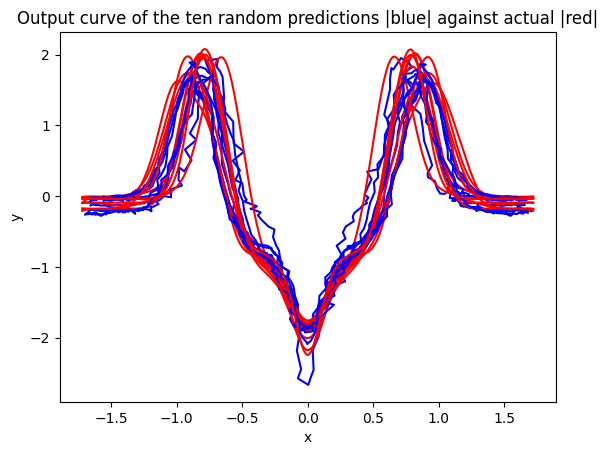

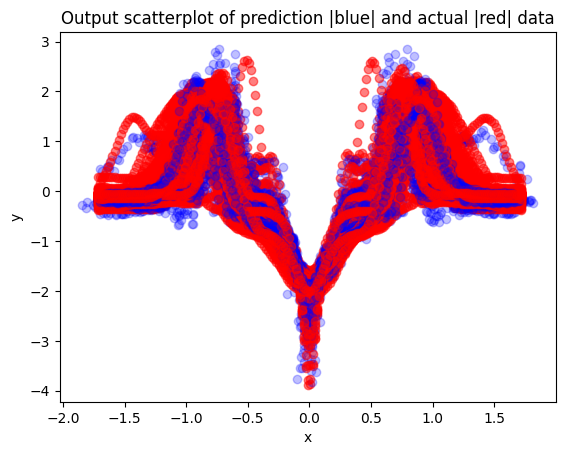

In [119]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(2000, activation="relu")(inputs)
x = layers.Dense(1000, activation="relu")(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss=training_loss)
model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=150),
             TensorBoard(log_dir='model_3_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=64, epochs=1500, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(Loss(test_output_values, model.predict(test_input_values))))
print('')
plots(test_output_values,model.predict(test_input_values))

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 1000)]            0         
                                                                 
 dense_30 (Dense)            (None, 2000)              2002000   
                                                                 
 dense_31 (Dense)            (None, 1000)              2001000   
                                                                 
 dense_32 (Dense)            (None, 400)               400400    
                                                                 
Total params: 4,403,400
Trainable params: 4,403,400
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1500
7/7 [==============================] - 2s 235ms/step - loss: 2.8325 - val_loss: 2.1101
Epoch 2/1500
7/7 [==============================] - 1s 88ms/step - loss: 2.3278 

7/7 [==============================] - 1s 76ms/step - loss: 0.9380 - val_loss: 1.3446
Epoch 155/1500
7/7 [==============================] - 1s 75ms/step - loss: 0.8837 - val_loss: 1.1667
Epoch 156/1500
7/7 [==============================] - 0s 72ms/step - loss: 0.8473 - val_loss: 1.1063
Epoch 157/1500
7/7 [==============================] - 0s 73ms/step - loss: 0.8799 - val_loss: 1.1429
Epoch 158/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.8810 - val_loss: 1.2373
Epoch 159/1500
7/7 [==============================] - 1s 75ms/step - loss: 0.9309 - val_loss: 1.2900
Epoch 160/1500
7/7 [==============================] - 0s 73ms/step - loss: 0.9139 - val_loss: 1.2919
Epoch 161/1500
7/7 [==============================] - 2s 372ms/step - loss: 0.8376 - val_loss: 1.1472
Epoch 162/1500
7/7 [==============================] - 1s 76ms/step - loss: 0.8928 - val_loss: 1.1602
Epoch 163/1500
7/7 [==============================] - 1s 75ms/step - loss: 0.8769 - val_loss: 1.1684
Epoc

Epoch 235/1500
7/7 [==============================] - 1s 75ms/step - loss: 0.7784 - val_loss: 1.1317
Epoch 236/1500
7/7 [==============================] - 0s 73ms/step - loss: 0.7804 - val_loss: 1.1506
Epoch 237/1500
7/7 [==============================] - 0s 72ms/step - loss: 0.7819 - val_loss: 1.1037
Epoch 238/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.7583 - val_loss: 1.1178
Epoch 239/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.8275 - val_loss: 1.1331
Epoch 240/1500
7/7 [==============================] - 0s 72ms/step - loss: 0.8723 - val_loss: 1.3386
Epoch 241/1500
7/7 [==============================] - 1s 179ms/step - loss: 0.7905 - val_loss: 1.0995
Epoch 242/1500
7/7 [==============================] - 1s 78ms/step - loss: 0.7799 - val_loss: 1.0844
Epoch 243/1500
7/7 [==============================] - 0s 73ms/step - loss: 0.8085 - val_loss: 1.1179
Epoch 244/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.7493 - val_lo

Epoch 316/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.8066 - val_loss: 1.1075
Epoch 317/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.7581 - val_loss: 1.0739
Epoch 318/1500
7/7 [==============================] - 0s 73ms/step - loss: 0.7481 - val_loss: 1.1131
Epoch 319/1500
7/7 [==============================] - 1s 78ms/step - loss: 0.7898 - val_loss: 1.0960
Epoch 320/1500
7/7 [==============================] - 1s 76ms/step - loss: 0.8415 - val_loss: 1.1304
Epoch 321/1500
7/7 [==============================] - 1s 173ms/step - loss: 0.8039 - val_loss: 1.1757
Epoch 322/1500
7/7 [==============================] - 1s 75ms/step - loss: 0.8096 - val_loss: 1.1472
Epoch 323/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.7823 - val_loss: 1.1564
Epoch 324/1500
7/7 [==============================] - 1s 91ms/step - loss: 0.7661 - val_loss: 1.1487
Epoch 325/1500
7/7 [==============================] - 1s 97ms/step - loss: 0.7606 - val_lo

Epoch 397/1500
7/7 [==============================] - 0s 73ms/step - loss: 0.6879 - val_loss: 1.0617
Epoch 398/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.7489 - val_loss: 1.1339
Epoch 399/1500
7/7 [==============================] - 1s 75ms/step - loss: 0.7469 - val_loss: 1.1290
Epoch 400/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.7884 - val_loss: 1.1875
Epoch 401/1500
7/7 [==============================] - 1s 177ms/step - loss: 0.7379 - val_loss: 1.0638
Epoch 402/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.7143 - val_loss: 1.0925
Epoch 403/1500
7/7 [==============================] - 1s 76ms/step - loss: 0.7425 - val_loss: 1.1334
Epoch 404/1500
7/7 [==============================] - 0s 72ms/step - loss: 0.8047 - val_loss: 1.1863
Epoch 405/1500
7/7 [==============================] - 1s 75ms/step - loss: 0.7469 - val_loss: 1.0986
Epoch 406/1500
7/7 [==============================] - 0s 73ms/step - loss: 0.7077 - val_lo

Epoch 478/1500
7/7 [==============================] - 1s 75ms/step - loss: 0.7044 - val_loss: 1.1019
Epoch 479/1500
7/7 [==============================] - 0s 70ms/step - loss: 0.7867 - val_loss: 1.1176
Epoch 480/1500
7/7 [==============================] - 1s 76ms/step - loss: 0.8095 - val_loss: 1.1835
Epoch 481/1500
7/7 [==============================] - 1s 213ms/step - loss: 0.7665 - val_loss: 1.1031
Epoch 482/1500
7/7 [==============================] - 1s 76ms/step - loss: 0.7226 - val_loss: 1.0721
Epoch 483/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.7049 - val_loss: 1.0534
Epoch 484/1500
7/7 [==============================] - 1s 84ms/step - loss: 0.7024 - val_loss: 1.0413
Epoch 485/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.6913 - val_loss: 1.0507
Epoch 486/1500
7/7 [==============================] - 1s 75ms/step - loss: 0.7388 - val_loss: 1.1464
Epoch 487/1500
7/7 [==============================] - 0s 73ms/step - loss: 0.7806 - val_lo

7/7 [==============================] - 1s 74ms/step - loss: 0.7306 - val_loss: 1.0927
Epoch 560/1500
7/7 [==============================] - 1s 76ms/step - loss: 0.6625 - val_loss: 1.0321
Epoch 561/1500
7/7 [==============================] - 1s 183ms/step - loss: 0.6966 - val_loss: 1.0604
Epoch 562/1500
7/7 [==============================] - 1s 81ms/step - loss: 0.7399 - val_loss: 1.1288
Epoch 563/1500
7/7 [==============================] - 1s 86ms/step - loss: 0.7695 - val_loss: 1.0958
Epoch 564/1500
7/7 [==============================] - 1s 88ms/step - loss: 0.7052 - val_loss: 1.0799
Epoch 565/1500
7/7 [==============================] - 1s 88ms/step - loss: 0.7452 - val_loss: 1.1051
Epoch 566/1500
7/7 [==============================] - 1s 89ms/step - loss: 0.7462 - val_loss: 1.1162
Epoch 567/1500
7/7 [==============================] - 1s 85ms/step - loss: 0.6991 - val_loss: 1.0717
Epoch 568/1500
7/7 [==============================] - 1s 84ms/step - loss: 0.7157 - val_loss: 1.0935
Epoc

7/7 [==============================] - 3s 486ms/step - loss: 0.7435 - val_loss: 1.0892
Epoch 641/1500
7/7 [==============================] - 3s 472ms/step - loss: 0.6947 - val_loss: 1.0861
Epoch 642/1500
7/7 [==============================] - 1s 76ms/step - loss: 0.7305 - val_loss: 1.0462
Epoch 643/1500
7/7 [==============================] - 1s 86ms/step - loss: 0.7287 - val_loss: 1.0750
Epoch 644/1500
7/7 [==============================] - 1s 89ms/step - loss: 0.7226 - val_loss: 1.0692
Epoch 645/1500
7/7 [==============================] - 1s 88ms/step - loss: 0.6982 - val_loss: 1.0776
Epoch 646/1500
7/7 [==============================] - 1s 127ms/step - loss: 0.6777 - val_loss: 1.0861
Epoch 647/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.6719 - val_loss: 1.0957
Epoch 648/1500
7/7 [==============================] - 1s 206ms/step - loss: 0.7085 - val_loss: 1.0684
Epoch 649/1500
7/7 [==============================] - 2s 389ms/step - loss: 0.7101 - val_loss: 1.0748


7/7 [==============================] - 1s 179ms/step - loss: 0.7360 - val_loss: 1.0569
Epoch 722/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.6959 - val_loss: 1.0362
Epoch 723/1500
7/7 [==============================] - 0s 71ms/step - loss: 0.6436 - val_loss: 1.0181
Epoch 724/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.6736 - val_loss: 1.0700
Epoch 725/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.7410 - val_loss: 1.1557
Epoch 726/1500
7/7 [==============================] - 1s 76ms/step - loss: 0.6755 - val_loss: 1.0573
Epoch 727/1500
7/7 [==============================] - 0s 72ms/step - loss: 0.6681 - val_loss: 1.0341
Epoch 728/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.6571 - val_loss: 1.0232
Epoch 729/1500
7/7 [==============================] - 1s 73ms/step - loss: 0.7412 - val_loss: 1.0905
Epoch 730/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.6734 - val_loss: 1.0407
Epoc

Epoch 802/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.6882 - val_loss: 1.0861
Epoch 803/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.6644 - val_loss: 1.1141
Epoch 804/1500
7/7 [==============================] - 0s 72ms/step - loss: 0.6871 - val_loss: 1.0576
Epoch 805/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.6740 - val_loss: 1.0408
Epoch 806/1500
7/7 [==============================] - 1s 115ms/step - loss: 0.7044 - val_loss: 1.0591
Epoch 807/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.7238 - val_loss: 1.0967
Epoch 808/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.7006 - val_loss: 1.1085
Epoch 809/1500
7/7 [==============================] - 0s 70ms/step - loss: 0.6940 - val_loss: 1.0878
Epoch 810/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.6835 - val_loss: 1.0755
Epoch 811/1500
7/7 [==============================] - 1s 174ms/step - loss: 0.6810 - val_l

Epoch 883/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.6720 - val_loss: 1.0713
Epoch 884/1500
7/7 [==============================] - 2s 268ms/step - loss: 0.6972 - val_loss: 1.0827
Epoch 885/1500
7/7 [==============================] - 3s 503ms/step - loss: 0.7221 - val_loss: 1.0464
Epoch 886/1500
7/7 [==============================] - 1s 105ms/step - loss: 0.6564 - val_loss: 1.0280
Epoch 887/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.6755 - val_loss: 1.0639
Epoch 888/1500
7/7 [==============================] - 3s 488ms/step - loss: 0.6690 - val_loss: 1.0513
Epoch 889/1500
7/7 [==============================] - 0s 72ms/step - loss: 0.7026 - val_loss: 1.0604
Epoch 890/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.6790 - val_loss: 1.0374
Epoch 891/1500
7/7 [==============================] - 1s 177ms/step - loss: 0.6998 - val_loss: 1.0320
Epoch 892/1500
7/7 [==============================] - 0s 72ms/step - loss: 0.7114 - va

Epoch 964/1500
7/7 [==============================] - 1s 75ms/step - loss: 0.6121 - val_loss: 1.0387
Epoch 965/1500
7/7 [==============================] - 0s 72ms/step - loss: 0.6413 - val_loss: 1.0331
Epoch 966/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.7451 - val_loss: 1.1431
Epoch 967/1500
7/7 [==============================] - 0s 73ms/step - loss: 0.6916 - val_loss: 1.0421
Epoch 968/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.6917 - val_loss: 1.0280
Epoch 969/1500
7/7 [==============================] - 0s 72ms/step - loss: 0.6453 - val_loss: 1.0089
Epoch 970/1500
7/7 [==============================] - 1s 112ms/step - loss: 0.6948 - val_loss: 1.0243
Epoch 971/1500
7/7 [==============================] - 2s 296ms/step - loss: 0.6248 - val_loss: 1.0228
Epoch 972/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.6597 - val_loss: 1.0936
Epoch 973/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.7026 - val_l

7/7 [==============================] - 1s 75ms/step - loss: 0.6891 - val_loss: 1.0569
Epoch 1125/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.6776 - val_loss: 1.0340
Epoch 1126/1500
7/7 [==============================] - 1s 76ms/step - loss: 0.6562 - val_loss: 1.0546
Epoch 1127/1500
7/7 [==============================] - 0s 70ms/step - loss: 0.7225 - val_loss: 1.1137
Epoch 1128/1500
7/7 [==============================] - 1s 75ms/step - loss: 0.6991 - val_loss: 1.0724
Epoch 1129/1500
7/7 [==============================] - 0s 70ms/step - loss: 0.6786 - val_loss: 1.0833
Epoch 1130/1500
7/7 [==============================] - 1s 75ms/step - loss: 0.7305 - val_loss: 1.0597
Epoch 1131/1500
7/7 [==============================] - 1s 180ms/step - loss: 0.6811 - val_loss: 1.0246
Epoch 1132/1500
7/7 [==============================] - 0s 73ms/step - loss: 0.6907 - val_loss: 1.0252
Epoch 1133/1500
7/7 [==============================] - 0s 73ms/step - loss: 0.6602 - val_loss: 1.

7/7 [==============================] - 1s 74ms/step - loss: 0.6577 - val_loss: 1.0652
Epoch 1285/1500
7/7 [==============================] - 1s 76ms/step - loss: 0.6595 - val_loss: 1.0505
Epoch 1286/1500
7/7 [==============================] - 0s 72ms/step - loss: 0.6568 - val_loss: 1.0217
Epoch 1287/1500
7/7 [==============================] - 0s 72ms/step - loss: 0.5917 - val_loss: 1.0048
Epoch 1288/1500
7/7 [==============================] - 0s 72ms/step - loss: 0.6574 - val_loss: 1.0284
Epoch 1289/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.6252 - val_loss: 1.0144
Epoch 1290/1500
7/7 [==============================] - 1s 75ms/step - loss: 0.6489 - val_loss: 1.0153
Epoch 1291/1500
7/7 [==============================] - 1s 177ms/step - loss: 0.6571 - val_loss: 1.0405
Epoch 1292/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.6681 - val_loss: 1.0539
Epoch 1293/1500
7/7 [==============================] - 1s 76ms/step - loss: 0.6776 - val_loss: 1.

7/7 [==============================] - 0s 73ms/step - loss: 0.6215 - val_loss: 1.0099
Epoch 1445/1500
7/7 [==============================] - 1s 76ms/step - loss: 0.6007 - val_loss: 1.0053
Epoch 1446/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.6451 - val_loss: 1.0311
Epoch 1447/1500
7/7 [==============================] - 0s 73ms/step - loss: 0.6894 - val_loss: 1.0372
Epoch 1448/1500
7/7 [==============================] - 1s 73ms/step - loss: 0.6392 - val_loss: 1.0144
Epoch 1449/1500
7/7 [==============================] - 0s 72ms/step - loss: 0.6129 - val_loss: 1.0026
Epoch 1450/1500
7/7 [==============================] - 1s 76ms/step - loss: 0.6428 - val_loss: 1.0027
Epoch 1451/1500
7/7 [==============================] - 1s 169ms/step - loss: 0.6255 - val_loss: 1.0121
Epoch 1452/1500
7/7 [==============================] - 0s 73ms/step - loss: 0.6440 - val_loss: 1.0373
Epoch 1453/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.6238 - val_loss: 1.

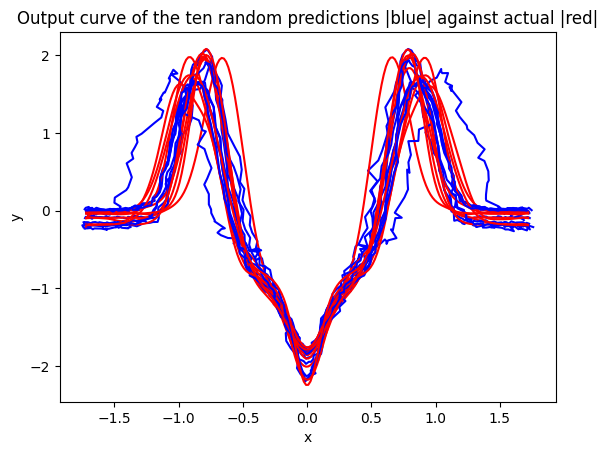

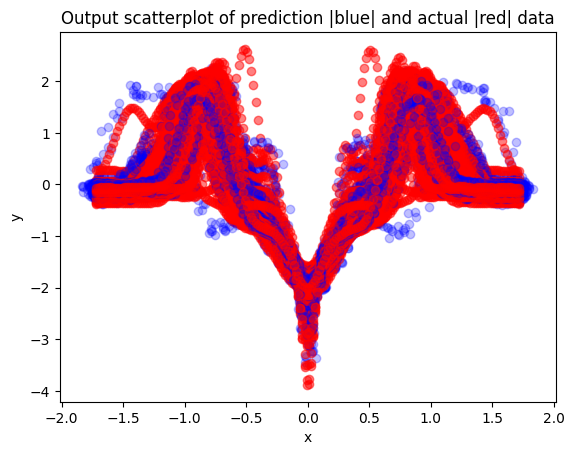

In [120]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(2000, activation="relu")(inputs)
x = layers.Dense(1000, activation="relu")(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss=training_loss)
model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=250),
             TensorBoard(log_dir='model_3_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=64, epochs=1500, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(Loss(test_output_values, model.predict(test_input_values))))
print('')
plots(test_output_values,model.predict(test_input_values))

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 1000)]            0         
                                                                 
 dense_33 (Dense)            (None, 3000)              3003000   
                                                                 
 dense_34 (Dense)            (None, 2000)              6002000   
                                                                 
 dense_35 (Dense)            (None, 1000)              2001000   
                                                                 
 dense_36 (Dense)            (None, 400)               400400    
                                                                 
Total params: 11,406,400
Trainable params: 11,406,400
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1500
7/7 [============================

7/7 [==============================] - 3s 431ms/step - loss: 0.9339 - val_loss: 1.3019
Epoch 152/1500
7/7 [==============================] - 1s 150ms/step - loss: 0.9487 - val_loss: 1.2252
Epoch 153/1500
7/7 [==============================] - 1s 152ms/step - loss: 1.0120 - val_loss: 1.3417
Epoch 154/1500
7/7 [==============================] - 1s 154ms/step - loss: 0.9329 - val_loss: 1.2388
Epoch 155/1500
7/7 [==============================] - 1s 155ms/step - loss: 0.8679 - val_loss: 1.2005
Epoch 156/1500
7/7 [==============================] - 1s 154ms/step - loss: 0.8846 - val_loss: 1.1674
Epoch 157/1500
7/7 [==============================] - 1s 157ms/step - loss: 0.9623 - val_loss: 1.2054
Epoch 158/1500
7/7 [==============================] - 1s 158ms/step - loss: 0.9643 - val_loss: 1.2395
Epoch 159/1500
7/7 [==============================] - 1s 155ms/step - loss: 1.0046 - val_loss: 1.3582
Epoch 160/1500
7/7 [==============================] - 1s 155ms/step - loss: 0.9534 - val_loss: 1.

7/7 [==============================] - 3s 465ms/step - loss: 0.8475 - val_loss: 1.1442
Epoch 312/1500
7/7 [==============================] - 2s 239ms/step - loss: 0.8878 - val_loss: 1.2023
Epoch 313/1500
7/7 [==============================] - 1s 163ms/step - loss: 0.8531 - val_loss: 1.2143
Epoch 314/1500
7/7 [==============================] - 1s 153ms/step - loss: 0.8766 - val_loss: 1.2359
Epoch 315/1500
7/7 [==============================] - 1s 150ms/step - loss: 0.9020 - val_loss: 1.1954
Epoch 316/1500
7/7 [==============================] - 1s 205ms/step - loss: 0.8543 - val_loss: 1.2191
Epoch 317/1500
7/7 [==============================] - 1s 148ms/step - loss: 0.8828 - val_loss: 1.1924
Epoch 318/1500
7/7 [==============================] - 1s 152ms/step - loss: 0.8000 - val_loss: 1.1844
Epoch 319/1500
7/7 [==============================] - 1s 188ms/step - loss: 0.8242 - val_loss: 1.1271
Epoch 320/1500
7/7 [==============================] - 1s 162ms/step - loss: 0.8490 - val_loss: 1.

7/7 [==============================] - 3s 436ms/step - loss: 0.7303 - val_loss: 1.0898
Epoch 472/1500
7/7 [==============================] - 1s 172ms/step - loss: 0.8158 - val_loss: 1.1743
Epoch 473/1500
7/7 [==============================] - 1s 153ms/step - loss: 0.8828 - val_loss: 1.1512
Epoch 474/1500
7/7 [==============================] - 1s 153ms/step - loss: 0.8673 - val_loss: 1.2460
Epoch 475/1500
7/7 [==============================] - 1s 150ms/step - loss: 0.8215 - val_loss: 1.1701
Epoch 476/1500
7/7 [==============================] - 1s 152ms/step - loss: 0.7907 - val_loss: 1.1333
Epoch 477/1500
7/7 [==============================] - 1s 154ms/step - loss: 0.7896 - val_loss: 1.1044
Epoch 478/1500
7/7 [==============================] - 1s 151ms/step - loss: 0.7613 - val_loss: 1.1091
Epoch 479/1500
7/7 [==============================] - 1s 157ms/step - loss: 0.7369 - val_loss: 1.0984
Epoch 480/1500
7/7 [==============================] - 1s 157ms/step - loss: 0.7276 - val_loss: 1.

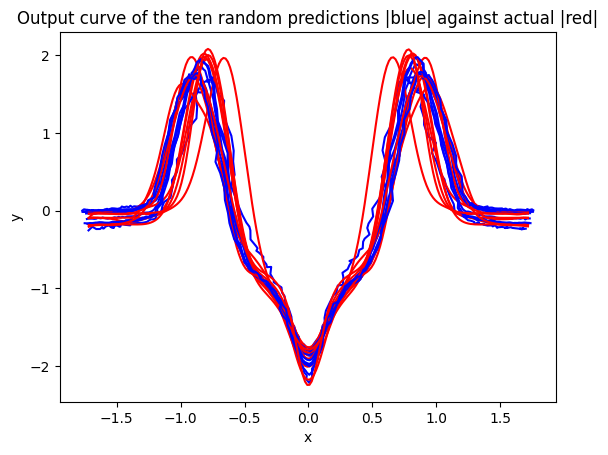

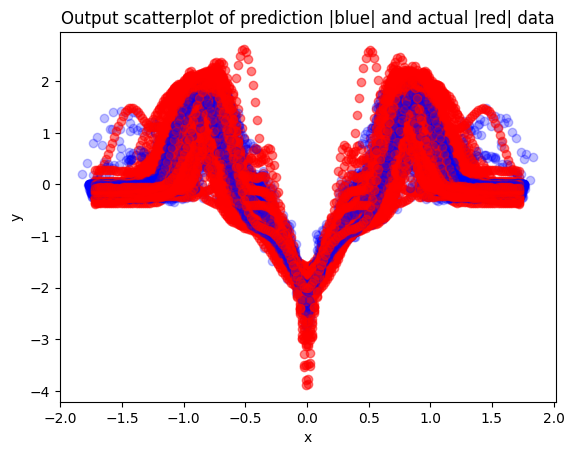

In [121]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(3000, activation="relu")(inputs)
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dense(1000, activation="relu")(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss=training_loss)
model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=150),
             TensorBoard(log_dir='model_3_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=64, epochs=1500, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(Loss(test_output_values, model.predict(test_input_values))))
print('')
plots(test_output_values,model.predict(test_input_values))

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 1000)]            0         
                                                                 
 dense_37 (Dense)            (None, 3000)              3003000   
                                                                 
 dense_38 (Dense)            (None, 2000)              6002000   
                                                                 
 dense_39 (Dense)            (None, 1000)              2001000   
                                                                 
 dense_40 (Dense)            (None, 400)               400400    
                                                                 
Total params: 11,406,400
Trainable params: 11,406,400
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
7/7 [=============================

Epoch 72/200
7/7 [==============================] - 1s 217ms/step - loss: 2.3318 - val_loss: 2.5484
Epoch 73/200
7/7 [==============================] - 1s 219ms/step - loss: 2.3479 - val_loss: 2.6071
Epoch 74/200
7/7 [==============================] - 2s 214ms/step - loss: 2.2925 - val_loss: 2.5064
Epoch 75/200
7/7 [==============================] - 1s 209ms/step - loss: 2.2962 - val_loss: 2.5719
Epoch 76/200
7/7 [==============================] - 1s 204ms/step - loss: 2.3131 - val_loss: 2.5135
Epoch 77/200
7/7 [==============================] - 2s 367ms/step - loss: 2.3563 - val_loss: 2.6665
Epoch 78/200
7/7 [==============================] - 1s 218ms/step - loss: 2.3120 - val_loss: 2.5070
Epoch 79/200
7/7 [==============================] - 1s 204ms/step - loss: 2.2682 - val_loss: 2.5285
Epoch 80/200
7/7 [==============================] - 1s 204ms/step - loss: 2.3282 - val_loss: 2.5848
Epoch 81/200
7/7 [==============================] - 3s 473ms/step - loss: 2.2397 - val_loss: 2.5121


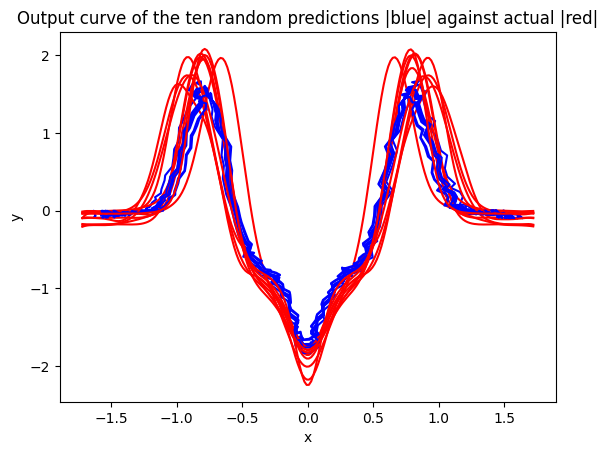

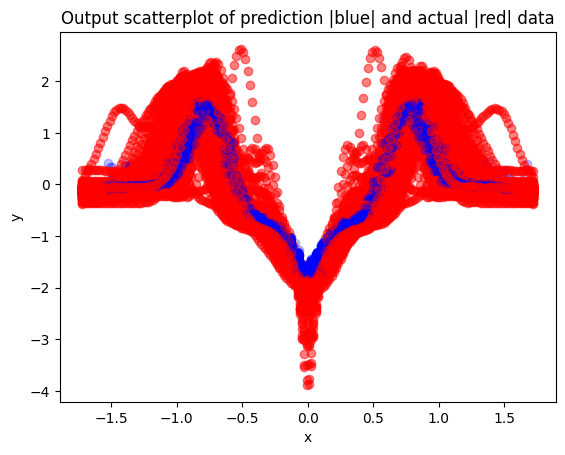

In [122]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(3000, activation="relu")(inputs)
x = layers.Dense(2000, activation="relu", kernel_regularizer=l1(0.001))(x)
x = layers.Dense(1000, activation="relu", kernel_regularizer=l1(0.001))(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss=training_loss)
model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=150),
             TensorBoard(log_dir='model_3_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=64, epochs=200, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(Loss(test_output_values, model.predict(test_input_values))))
print('')
plots(test_output_values,model.predict(test_input_values))

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 1000)]            0         
                                                                 
 dense_41 (Dense)            (None, 3000)              3003000   
                                                                 
 dense_42 (Dense)            (None, 2000)              6002000   
                                                                 
 dense_43 (Dense)            (None, 1000)              2001000   
                                                                 
 dense_44 (Dense)            (None, 400)               400400    
                                                                 
Total params: 11,406,400
Trainable params: 11,406,400
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
7/7 [=============================

7/7 [==============================] - 1s 182ms/step - loss: 1.7126 - val_loss: 2.0889
Epoch 73/200
7/7 [==============================] - 1s 210ms/step - loss: 1.6296 - val_loss: 1.8560
Epoch 74/200
7/7 [==============================] - 1s 203ms/step - loss: 1.5690 - val_loss: 1.8973
Epoch 75/200
7/7 [==============================] - 1s 202ms/step - loss: 1.6464 - val_loss: 1.8959
Epoch 76/200
7/7 [==============================] - 1s 194ms/step - loss: 1.6041 - val_loss: 1.9492
Epoch 77/200
7/7 [==============================] - 2s 231ms/step - loss: 1.6092 - val_loss: 1.8907
Epoch 78/200
7/7 [==============================] - 2s 272ms/step - loss: 1.5071 - val_loss: 1.8223
Epoch 79/200
7/7 [==============================] - 1s 214ms/step - loss: 1.5087 - val_loss: 1.7603
Epoch 80/200
7/7 [==============================] - 1s 198ms/step - loss: 1.6174 - val_loss: 1.9412
Epoch 81/200
7/7 [==============================] - 3s 492ms/step - loss: 1.5082 - val_loss: 1.8243
Epoch 82/200


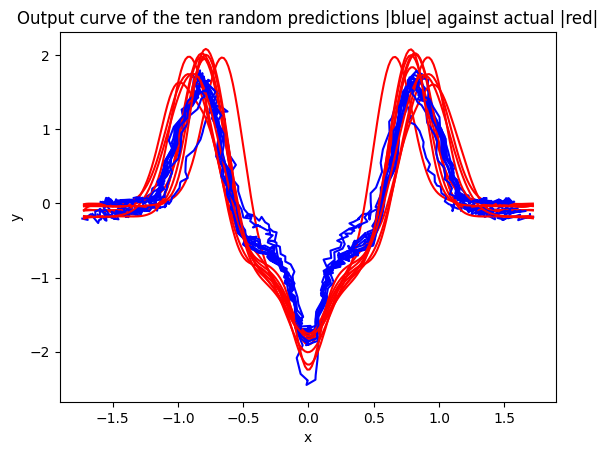

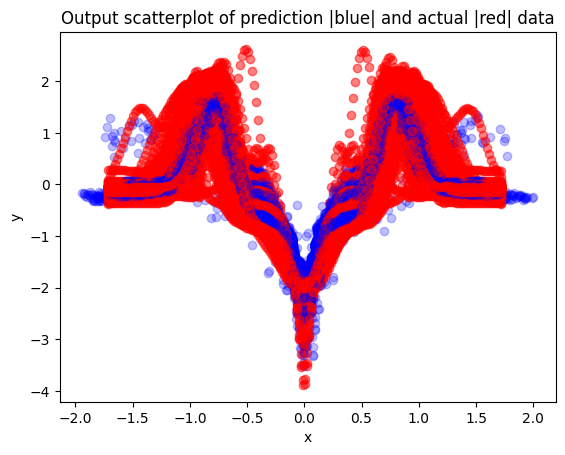

In [123]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(3000, activation="relu")(inputs)
x = layers.Dense(2000, activation="relu", kernel_regularizer=l1(0.0001))(x)
x = layers.Dense(1000, activation="relu", kernel_regularizer=l1(0.0001))(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss=training_loss)
model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=150),
             TensorBoard(log_dir='model_3_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=64, epochs=200, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(Loss(test_output_values, model.predict(test_input_values))))
print('')
plots(test_output_values,model.predict(test_input_values))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1000)]            0         
                                                                 
 dense (Dense)               (None, 3000)              3003000   
                                                                 
 dense_1 (Dense)             (None, 2000)              6002000   
                                                                 
 dense_2 (Dense)             (None, 1000)              2001000   
                                                                 
 dense_3 (Dense)             (None, 400)               400400    
                                                                 
Total params: 11,406,400
Trainable params: 11,406,400
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
7/7 [==============================] 

7/7 [==============================] - 1s 204ms/step - loss: 3.7794 - val_loss: 3.5138
Epoch 73/200
7/7 [==============================] - 1s 220ms/step - loss: 3.8583 - val_loss: 2.8945
Epoch 74/200
7/7 [==============================] - 1s 220ms/step - loss: 2.9813 - val_loss: 2.7265
Epoch 75/200
7/7 [==============================] - 1s 202ms/step - loss: 2.4388 - val_loss: 2.7973
Epoch 76/200
7/7 [==============================] - 2s 221ms/step - loss: 2.8164 - val_loss: 2.7277
Epoch 77/200
7/7 [==============================] - 2s 222ms/step - loss: 2.4917 - val_loss: 2.7591
Epoch 78/200
7/7 [==============================] - 2s 222ms/step - loss: 2.7087 - val_loss: 2.7880
Epoch 79/200
7/7 [==============================] - 1s 219ms/step - loss: 2.9816 - val_loss: 2.8871
Epoch 80/200
7/7 [==============================] - 1s 220ms/step - loss: 2.9581 - val_loss: 2.6095
Epoch 81/200
7/7 [==============================] - 4s 642ms/step - loss: 2.2356 - val_loss: 2.5538
Epoch 82/200


7/7 [==============================] - 2s 293ms/step - loss: 1.9787 - val_loss: 2.1170
Epoch 154/200
7/7 [==============================] - 2s 278ms/step - loss: 1.9932 - val_loss: 2.0903
Epoch 155/200
7/7 [==============================] - 1s 214ms/step - loss: 1.8065 - val_loss: 2.1008
Epoch 156/200
7/7 [==============================] - 1s 203ms/step - loss: 1.8838 - val_loss: 1.9843
Epoch 157/200
7/7 [==============================] - 2s 226ms/step - loss: 1.9412 - val_loss: 2.1395
Epoch 158/200
7/7 [==============================] - 1s 206ms/step - loss: 1.9013 - val_loss: 2.0557
Epoch 159/200
7/7 [==============================] - 2s 228ms/step - loss: 1.8549 - val_loss: 2.0591
Epoch 160/200
7/7 [==============================] - 1s 206ms/step - loss: 1.8812 - val_loss: 1.9689
Epoch 161/200
7/7 [==============================] - 3s 499ms/step - loss: 2.1180 - val_loss: 2.2323
Epoch 162/200
7/7 [==============================] - 1s 205ms/step - loss: 1.9709 - val_loss: 2.0534
Epoc

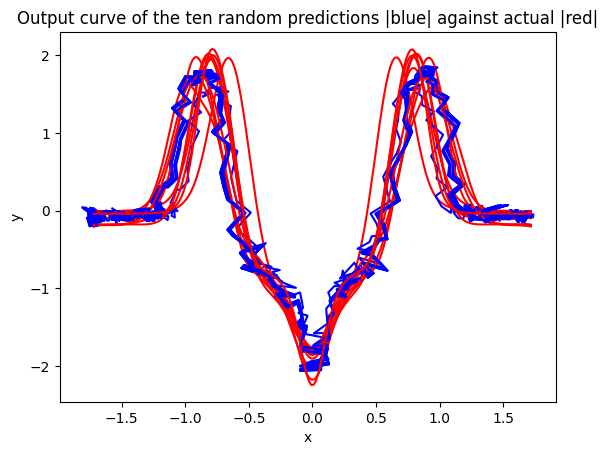

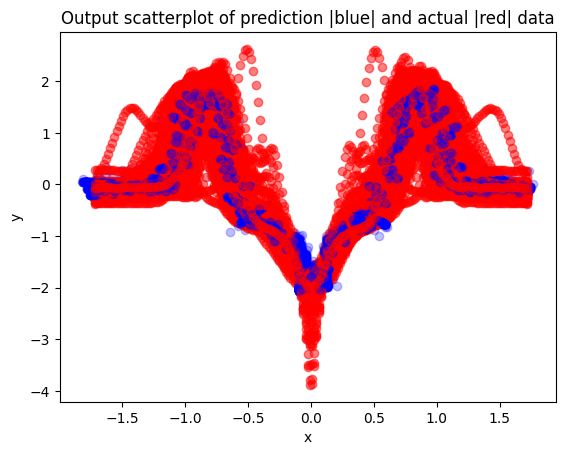

In [12]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(3000, activation="relu", kernel_regularizer=l1(0.0001))(inputs)
x = layers.Dense(2000, activation="relu", kernel_regularizer=l1(0.0001))(x)
x = layers.Dense(1000, activation="relu", kernel_regularizer=l1(0.0001))(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss=training_loss)
model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=150),
             TensorBoard(log_dir='model_3_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=64, epochs=200, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(Loss(test_output_values, model.predict(test_input_values))))
print('')
plots(test_output_values,model.predict(test_input_values))

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1000)]            0         
                                                                 
 dense_4 (Dense)             (None, 3000)              3003000   
                                                                 
 dense_5 (Dense)             (None, 2000)              6002000   
                                                                 
 dense_6 (Dense)             (None, 1000)              2001000   
                                                                 
 dense_7 (Dense)             (None, 400)               400400    
                                                                 
Total params: 11,406,400
Trainable params: 11,406,400
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
7/7 [==============================

7/7 [==============================] - 1s 215ms/step - loss: 3.3307 - val_loss: 3.2622
Epoch 73/200
7/7 [==============================] - 2s 237ms/step - loss: 2.4879 - val_loss: 2.0429
Epoch 74/200
7/7 [==============================] - 2s 247ms/step - loss: 2.6528 - val_loss: 2.5275
Epoch 75/200
7/7 [==============================] - 1s 216ms/step - loss: 2.2972 - val_loss: 2.0468
Epoch 76/200
7/7 [==============================] - 1s 217ms/step - loss: 2.8851 - val_loss: 3.6405
Epoch 77/200
7/7 [==============================] - 2s 221ms/step - loss: 2.4767 - val_loss: 2.1204
Epoch 78/200
7/7 [==============================] - 1s 218ms/step - loss: 1.9995 - val_loss: 2.2650
Epoch 79/200
7/7 [==============================] - 1s 216ms/step - loss: 1.9564 - val_loss: 2.1156
Epoch 80/200
7/7 [==============================] - 2s 226ms/step - loss: 2.0503 - val_loss: 2.2953
Epoch 81/200
7/7 [==============================] - 3s 492ms/step - loss: 2.0532 - val_loss: 1.9307
Epoch 82/200


7/7 [==============================] - 1s 214ms/step - loss: 1.2426 - val_loss: 1.5418
Epoch 154/200
7/7 [==============================] - 2s 224ms/step - loss: 1.1867 - val_loss: 1.5053
Epoch 155/200
7/7 [==============================] - 1s 218ms/step - loss: 1.3068 - val_loss: 1.6219
Epoch 156/200
7/7 [==============================] - 2s 229ms/step - loss: 1.6877 - val_loss: 1.9544
Epoch 157/200
7/7 [==============================] - 1s 218ms/step - loss: 1.4958 - val_loss: 1.6539
Epoch 158/200
7/7 [==============================] - 2s 225ms/step - loss: 1.4663 - val_loss: 1.6549
Epoch 159/200
7/7 [==============================] - 1s 204ms/step - loss: 1.5221 - val_loss: 1.5270
Epoch 160/200
7/7 [==============================] - 2s 224ms/step - loss: 1.6541 - val_loss: 1.8786
Epoch 161/200
7/7 [==============================] - 3s 495ms/step - loss: 1.4770 - val_loss: 1.5987
Epoch 162/200
7/7 [==============================] - 1s 217ms/step - loss: 1.5297 - val_loss: 2.0135
Epoc

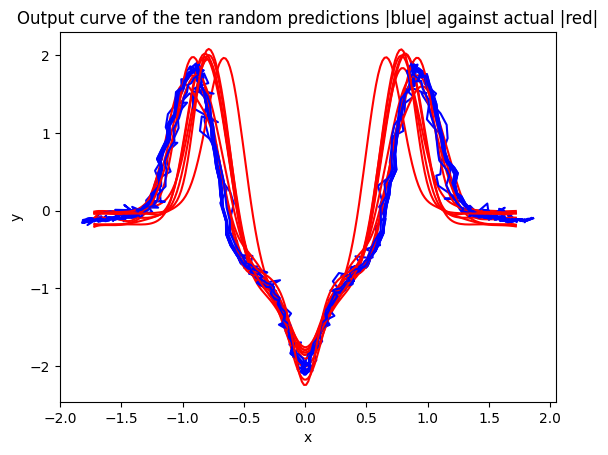

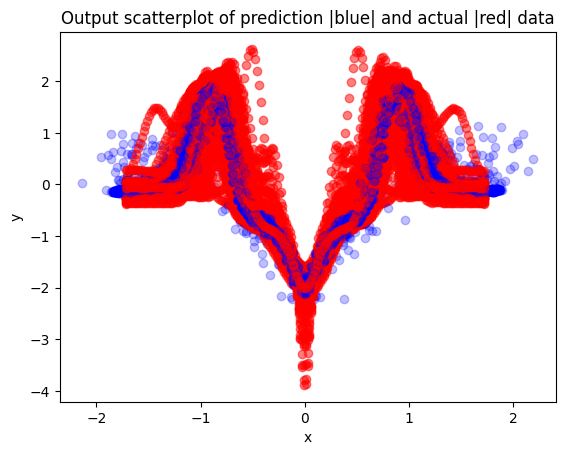

In [13]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(3000, activation="relu", kernel_regularizer=l1(0.00001))(inputs)
x = layers.Dense(2000, activation="relu", kernel_regularizer=l1(0.00001))(x)
x = layers.Dense(1000, activation="relu", kernel_regularizer=l1(0.00001))(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss=training_loss)
model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=150),
             TensorBoard(log_dir='model_3_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=64, epochs=200, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(Loss(test_output_values, model.predict(test_input_values))))
print('')
plots(test_output_values,model.predict(test_input_values))

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1000)]            0         
                                                                 
 dense_8 (Dense)             (None, 3000)              3003000   
                                                                 
 dropout (Dropout)           (None, 3000)              0         
                                                                 
 dense_9 (Dense)             (None, 2000)              6002000   
                                                                 
 dropout_1 (Dropout)         (None, 2000)              0         
                                                                 
 dense_10 (Dense)            (None, 1000)              2001000   
                                                                 
 dropout_2 (Dropout)         (None, 1000)              0   

7/7 [==============================] - 1s 152ms/step - loss: 1.4271 - val_loss: 1.3839
Epoch 69/200
7/7 [==============================] - 1s 157ms/step - loss: 1.3517 - val_loss: 2.0232
Epoch 70/200
7/7 [==============================] - 1s 156ms/step - loss: 1.3161 - val_loss: 1.5226
Epoch 71/200
7/7 [==============================] - 3s 424ms/step - loss: 1.3687 - val_loss: 2.1835
Epoch 72/200
7/7 [==============================] - 1s 155ms/step - loss: 1.2969 - val_loss: 1.5222
Epoch 73/200
7/7 [==============================] - 1s 156ms/step - loss: 1.2867 - val_loss: 1.8073
Epoch 74/200
7/7 [==============================] - 1s 161ms/step - loss: 1.4582 - val_loss: 1.3614
Epoch 75/200
7/7 [==============================] - 1s 165ms/step - loss: 1.5156 - val_loss: 2.6115
Epoch 76/200
7/7 [==============================] - 1s 164ms/step - loss: 1.6031 - val_loss: 1.5120
Epoch 77/200
7/7 [==============================] - 1s 154ms/step - loss: 1.3463 - val_loss: 1.7193
Epoch 78/200


7/7 [==============================] - 1s 156ms/step - loss: 1.0624 - val_loss: 1.3074
Epoch 150/200
7/7 [==============================] - 1s 154ms/step - loss: 0.9799 - val_loss: 1.3681
Epoch 151/200
7/7 [==============================] - 3s 434ms/step - loss: 1.0493 - val_loss: 1.3882
Epoch 152/200
7/7 [==============================] - 1s 156ms/step - loss: 0.9815 - val_loss: 1.2690
Epoch 153/200
7/7 [==============================] - 1s 158ms/step - loss: 1.0386 - val_loss: 1.3326
Epoch 154/200
7/7 [==============================] - 1s 155ms/step - loss: 1.0898 - val_loss: 1.5739
Epoch 155/200
7/7 [==============================] - 1s 204ms/step - loss: 1.0723 - val_loss: 1.3167
Epoch 156/200
7/7 [==============================] - 2s 326ms/step - loss: 1.0452 - val_loss: 1.4972
Epoch 157/200
7/7 [==============================] - 1s 153ms/step - loss: 1.1005 - val_loss: 1.2564
Epoch 158/200
7/7 [==============================] - 1s 155ms/step - loss: 1.0387 - val_loss: 1.4688
Epoc

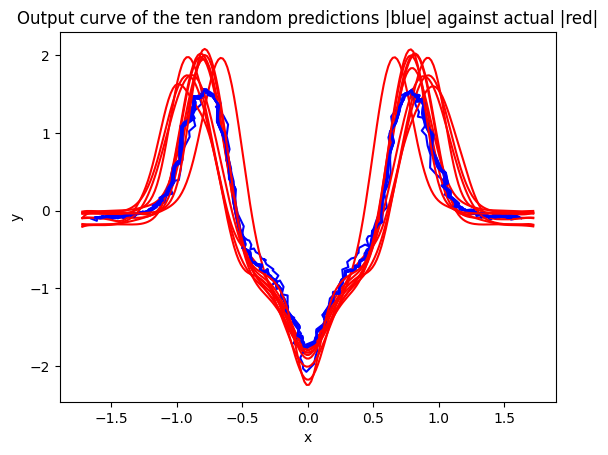

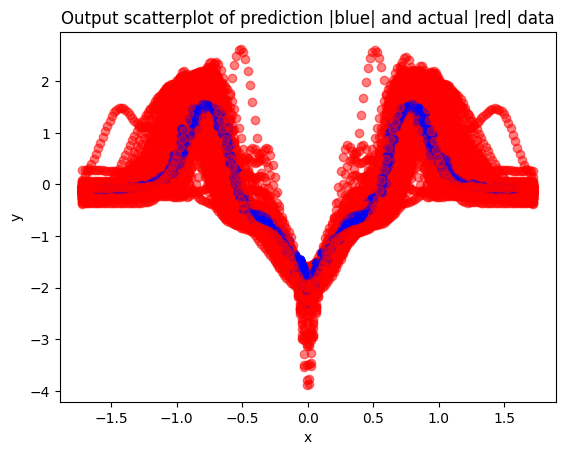

In [14]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(3000, activation="relu")(inputs)
x = layers.Dropout(0.2, seed=42)(x)
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dropout(0.2, seed=42)(x)
x = layers.Dense(1000, activation="relu")(x)
x = layers.Dropout(0.2, seed=42)(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss=training_loss)
model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=150),
             TensorBoard(log_dir='model_3_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=64, epochs=200, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(Loss(test_output_values, model.predict(test_input_values))))
print('')
plots(test_output_values,model.predict(test_input_values))

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1000)]            0         
                                                                 
 dense_12 (Dense)            (None, 2000)              2002000   
                                                                 
 dropout_3 (Dropout)         (None, 2000)              0         
                                                                 
 dense_13 (Dense)            (None, 1000)              2001000   
                                                                 
 dropout_4 (Dropout)         (None, 1000)              0         
                                                                 
 dense_14 (Dense)            (None, 500)               500500    
                                                                 
 dropout_5 (Dropout)         (None, 500)               0   

Epoch 69/200
7/7 [==============================] - 1s 79ms/step - loss: 1.5742 - val_loss: 2.2765
Epoch 70/200
7/7 [==============================] - 1s 79ms/step - loss: 1.4857 - val_loss: 1.3945
Epoch 71/200
7/7 [==============================] - 1s 183ms/step - loss: 1.4347 - val_loss: 1.3125
Epoch 72/200
7/7 [==============================] - 1s 79ms/step - loss: 1.4892 - val_loss: 2.2594
Epoch 73/200
7/7 [==============================] - 1s 82ms/step - loss: 1.3956 - val_loss: 1.2993
Epoch 74/200
7/7 [==============================] - 1s 80ms/step - loss: 1.1457 - val_loss: 1.4204
Epoch 75/200
7/7 [==============================] - 1s 80ms/step - loss: 1.2455 - val_loss: 1.6917
Epoch 76/200
7/7 [==============================] - 1s 80ms/step - loss: 1.2163 - val_loss: 1.2291
Epoch 77/200
7/7 [==============================] - 1s 76ms/step - loss: 1.1748 - val_loss: 1.5270
Epoch 78/200
7/7 [==============================] - 1s 80ms/step - loss: 1.1640 - val_loss: 1.3376
Epoch 79/

7/7 [==============================] - 1s 188ms/step - loss: 1.1136 - val_loss: 1.3585
Epoch 152/200
7/7 [==============================] - 1s 79ms/step - loss: 1.0585 - val_loss: 1.3298
Epoch 153/200
7/7 [==============================] - 1s 82ms/step - loss: 1.0946 - val_loss: 1.2046
Epoch 154/200
7/7 [==============================] - 1s 76ms/step - loss: 1.0115 - val_loss: 1.3176
Epoch 155/200
7/7 [==============================] - 1s 80ms/step - loss: 1.1225 - val_loss: 1.2531
Epoch 156/200
7/7 [==============================] - 1s 81ms/step - loss: 1.3482 - val_loss: 2.1138
Epoch 157/200
7/7 [==============================] - 1s 78ms/step - loss: 1.2814 - val_loss: 1.2485
Epoch 158/200
7/7 [==============================] - 1s 79ms/step - loss: 1.1088 - val_loss: 1.2209
Epoch 159/200
7/7 [==============================] - 1s 79ms/step - loss: 1.0986 - val_loss: 1.4753
Epoch 160/200
7/7 [==============================] - 1s 80ms/step - loss: 1.0568 - val_loss: 1.2235
Epoch 161/200

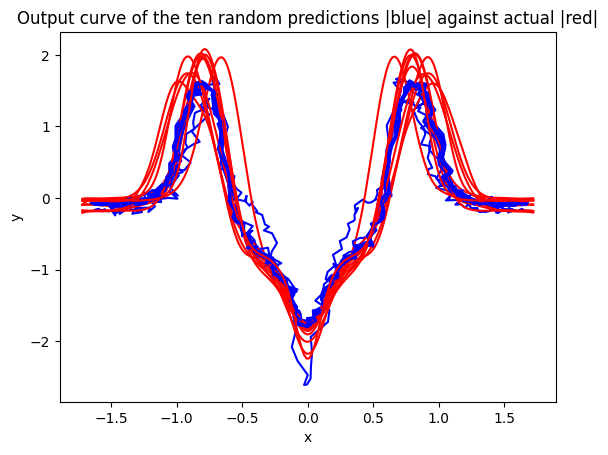

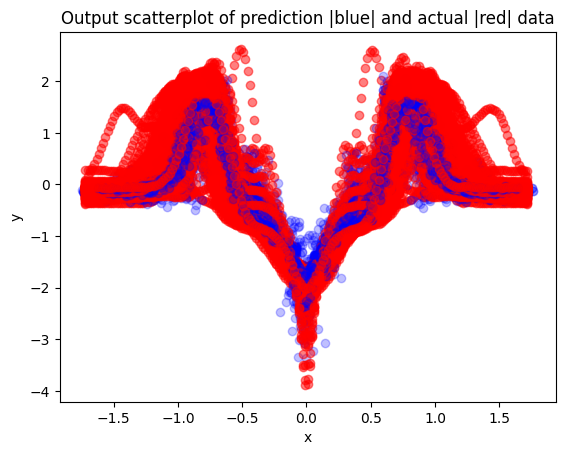

In [15]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(2000, activation="relu")(inputs)
x = layers.Dropout(0.1, seed=42)(x)
x = layers.Dense(1000, activation="relu")(x)
x = layers.Dropout(0.1, seed=42)(x)
x = layers.Dense(500, activation="relu")(x)
x = layers.Dropout(0.1, seed=42)(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss=training_loss)
model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=150),
             TensorBoard(log_dir='model_3_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=64, epochs=200, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(Loss(test_output_values, model.predict(test_input_values))))
print('')
plots(test_output_values,model.predict(test_input_values))

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1000)]            0         
                                                                 
 dense_16 (Dense)            (None, 2000)              2002000   
                                                                 
 dropout_6 (Dropout)         (None, 2000)              0         
                                                                 
 dense_17 (Dense)            (None, 1000)              2001000   
                                                                 
 dropout_7 (Dropout)         (None, 1000)              0         
                                                                 
 dense_18 (Dense)            (None, 500)               500500    
                                                                 
 dropout_8 (Dropout)         (None, 500)               0   

7/7 [==============================] - 1s 126ms/step - loss: 1.6147 - val_loss: 1.3872
Epoch 69/1500
7/7 [==============================] - 1s 88ms/step - loss: 1.5956 - val_loss: 1.3104
Epoch 70/1500
7/7 [==============================] - 1s 79ms/step - loss: 1.2813 - val_loss: 1.3788
Epoch 71/1500
7/7 [==============================] - 1s 190ms/step - loss: 1.2311 - val_loss: 1.3891
Epoch 72/1500
7/7 [==============================] - 1s 80ms/step - loss: 1.2500 - val_loss: 1.4395
Epoch 73/1500
7/7 [==============================] - 1s 78ms/step - loss: 1.2710 - val_loss: 1.5460
Epoch 74/1500
7/7 [==============================] - 1s 78ms/step - loss: 1.2363 - val_loss: 1.4489
Epoch 75/1500
7/7 [==============================] - 1s 80ms/step - loss: 1.1567 - val_loss: 1.3140
Epoch 76/1500
7/7 [==============================] - 1s 81ms/step - loss: 1.1643 - val_loss: 1.4828
Epoch 77/1500
7/7 [==============================] - 1s 79ms/step - loss: 1.0980 - val_loss: 1.2578
Epoch 78/150

7/7 [==============================] - 1s 83ms/step - loss: 1.0456 - val_loss: 1.1720
Epoch 150/1500
7/7 [==============================] - 1s 83ms/step - loss: 1.1198 - val_loss: 1.4999
Epoch 151/1500
7/7 [==============================] - 1s 200ms/step - loss: 1.0462 - val_loss: 1.2065
Epoch 152/1500
7/7 [==============================] - 1s 80ms/step - loss: 1.0338 - val_loss: 1.3320
Epoch 153/1500
7/7 [==============================] - 1s 121ms/step - loss: 1.0050 - val_loss: 1.2036
Epoch 154/1500
7/7 [==============================] - 2s 272ms/step - loss: 1.1011 - val_loss: 1.2515
Epoch 155/1500
7/7 [==============================] - 1s 134ms/step - loss: 1.0136 - val_loss: 1.3443
Epoch 156/1500
7/7 [==============================] - 1s 97ms/step - loss: 1.0462 - val_loss: 1.1820
Epoch 157/1500
7/7 [==============================] - 1s 79ms/step - loss: 1.0408 - val_loss: 1.4163
Epoch 158/1500
7/7 [==============================] - 1s 80ms/step - loss: 1.0326 - val_loss: 1.2629
E

7/7 [==============================] - 1s 93ms/step - loss: 1.1226 - val_loss: 1.1602
Epoch 231/1500
7/7 [==============================] - 2s 241ms/step - loss: 1.1140 - val_loss: 1.6607
Epoch 232/1500
7/7 [==============================] - 1s 94ms/step - loss: 1.2053 - val_loss: 1.3938
Epoch 233/1500
7/7 [==============================] - 1s 91ms/step - loss: 1.1003 - val_loss: 1.1850
Epoch 234/1500
7/7 [==============================] - 1s 92ms/step - loss: 1.0063 - val_loss: 1.3429
Epoch 235/1500
7/7 [==============================] - 1s 89ms/step - loss: 0.9976 - val_loss: 1.1480
Epoch 236/1500
7/7 [==============================] - 1s 78ms/step - loss: 0.9894 - val_loss: 1.2791
Epoch 237/1500
7/7 [==============================] - 1s 81ms/step - loss: 1.0141 - val_loss: 1.1519
Epoch 238/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.9641 - val_loss: 1.2876
Epoch 239/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.9260 - val_loss: 1.2472
Epoc

7/7 [==============================] - 1s 192ms/step - loss: 0.9944 - val_loss: 1.2108
Epoch 312/1500
7/7 [==============================] - 1s 80ms/step - loss: 1.0231 - val_loss: 1.2159
Epoch 313/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.9459 - val_loss: 1.2154
Epoch 314/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.9204 - val_loss: 1.1404
Epoch 315/1500
7/7 [==============================] - 1s 78ms/step - loss: 0.9201 - val_loss: 1.1891
Epoch 316/1500
7/7 [==============================] - 1s 81ms/step - loss: 0.9097 - val_loss: 1.1423
Epoch 317/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.9173 - val_loss: 1.1514
Epoch 318/1500
7/7 [==============================] - 1s 76ms/step - loss: 0.8893 - val_loss: 1.1754
Epoch 319/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.8972 - val_loss: 1.1803
Epoch 320/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.9036 - val_loss: 1.1969
Epoc

7/7 [==============================] - 1s 78ms/step - loss: 0.8744 - val_loss: 1.1872
Epoch 393/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.9117 - val_loss: 1.1355
Epoch 394/1500
7/7 [==============================] - 1s 89ms/step - loss: 0.8338 - val_loss: 1.1072
Epoch 395/1500
7/7 [==============================] - 1s 82ms/step - loss: 0.8934 - val_loss: 1.1255
Epoch 396/1500
7/7 [==============================] - 1s 78ms/step - loss: 0.9390 - val_loss: 1.1183
Epoch 397/1500
7/7 [==============================] - 1s 81ms/step - loss: 0.8662 - val_loss: 1.1165
Epoch 398/1500
7/7 [==============================] - 1s 99ms/step - loss: 0.8689 - val_loss: 1.1229
Epoch 399/1500
7/7 [==============================] - 1s 99ms/step - loss: 0.8585 - val_loss: 1.1512
Epoch 400/1500
7/7 [==============================] - 1s 92ms/step - loss: 0.8714 - val_loss: 1.1645
Epoch 401/1500
7/7 [==============================] - 2s 252ms/step - loss: 0.8540 - val_loss: 1.1584
Epoc

7/7 [==============================] - 1s 81ms/step - loss: 0.9304 - val_loss: 1.2169
Epoch 474/1500
7/7 [==============================] - 1s 81ms/step - loss: 0.9452 - val_loss: 1.1904
Epoch 475/1500
7/7 [==============================] - 1s 81ms/step - loss: 0.9526 - val_loss: 1.1826
Epoch 476/1500
7/7 [==============================] - 1s 83ms/step - loss: 0.9204 - val_loss: 1.2036
Epoch 477/1500
7/7 [==============================] - 1s 76ms/step - loss: 0.9903 - val_loss: 1.2144
Epoch 478/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.9208 - val_loss: 1.2185
Epoch 479/1500
7/7 [==============================] - 1s 83ms/step - loss: 0.8919 - val_loss: 1.1840
Epoch 480/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.9422 - val_loss: 1.2200
Epoch 481/1500
7/7 [==============================] - 1s 193ms/step - loss: 0.8504 - val_loss: 1.1907
Epoch 482/1500
7/7 [==============================] - 1s 81ms/step - loss: 0.8923 - val_loss: 1.1855
Epoc

7/7 [==============================] - 1s 80ms/step - loss: 0.8287 - val_loss: 1.1342
Epoch 555/1500
7/7 [==============================] - 1s 83ms/step - loss: 0.8121 - val_loss: 1.1383
Epoch 556/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.8192 - val_loss: 1.1385
Epoch 557/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.8272 - val_loss: 1.1331
Epoch 558/1500
7/7 [==============================] - 1s 81ms/step - loss: 0.8742 - val_loss: 1.1209
Epoch 559/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.8394 - val_loss: 1.1229
Epoch 560/1500
7/7 [==============================] - 1s 82ms/step - loss: 0.9089 - val_loss: 1.1393
Epoch 561/1500
7/7 [==============================] - 1s 191ms/step - loss: 0.8870 - val_loss: 1.1333
Epoch 562/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.8148 - val_loss: 1.1364
Epoch 563/1500
7/7 [==============================] - 1s 85ms/step - loss: 0.8274 - val_loss: 1.1511
Epoc

7/7 [==============================] - 1s 92ms/step - loss: 0.8923 - val_loss: 1.1170
Epoch 636/1500
7/7 [==============================] - 1s 78ms/step - loss: 0.8952 - val_loss: 1.1325
Epoch 637/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.8353 - val_loss: 1.1372
Epoch 638/1500
7/7 [==============================] - 4s 575ms/step - loss: 0.7977 - val_loss: 1.1336
Epoch 639/1500
7/7 [==============================] - 2s 377ms/step - loss: 0.8067 - val_loss: 1.1149
Epoch 640/1500
7/7 [==============================] - 2s 381ms/step - loss: 0.8115 - val_loss: 1.1039
Epoch 641/1500
7/7 [==============================] - 4s 657ms/step - loss: 0.8093 - val_loss: 1.1124
Epoch 642/1500
7/7 [==============================] - 4s 613ms/step - loss: 0.8160 - val_loss: 1.0802
Epoch 643/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.8609 - val_loss: 1.1051
Epoch 644/1500
7/7 [==============================] - 3s 441ms/step - loss: 0.8797 - val_loss: 1.1236

Epoch 716/1500
7/7 [==============================] - 1s 83ms/step - loss: 0.8296 - val_loss: 1.1083
Epoch 717/1500
7/7 [==============================] - 1s 87ms/step - loss: 0.7692 - val_loss: 1.0863
Epoch 718/1500
7/7 [==============================] - 1s 118ms/step - loss: 0.7919 - val_loss: 1.0960
Epoch 719/1500
7/7 [==============================] - 1s 87ms/step - loss: 0.7807 - val_loss: 1.0946
Epoch 720/1500
7/7 [==============================] - 1s 91ms/step - loss: 0.7709 - val_loss: 1.0924
Epoch 721/1500
7/7 [==============================] - 1s 210ms/step - loss: 0.8588 - val_loss: 1.0955
Epoch 722/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.8022 - val_loss: 1.0948
Epoch 723/1500
7/7 [==============================] - 1s 83ms/step - loss: 0.8080 - val_loss: 1.0846
Epoch 724/1500
7/7 [==============================] - 1s 89ms/step - loss: 0.8138 - val_loss: 1.0895
Epoch 725/1500
7/7 [==============================] - 1s 82ms/step - loss: 0.8471 - val_l

7/7 [==============================] - 1s 80ms/step - loss: 0.8438 - val_loss: 1.1304
Epoch 798/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.7990 - val_loss: 1.0860
Epoch 799/1500
7/7 [==============================] - 1s 76ms/step - loss: 0.8645 - val_loss: 1.1325
Epoch 800/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.8458 - val_loss: 1.1295
Epoch 801/1500
7/7 [==============================] - 1s 188ms/step - loss: 0.9201 - val_loss: 1.1523
Epoch 802/1500
7/7 [==============================] - 1s 78ms/step - loss: 0.8470 - val_loss: 1.1316
Epoch 803/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.8656 - val_loss: 1.1314
Epoch 804/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.8206 - val_loss: 1.1274
Epoch 805/1500
7/7 [==============================] - 1s 78ms/step - loss: 0.8123 - val_loss: 1.1014
Epoch 806/1500
7/7 [==============================] - 1s 78ms/step - loss: 0.8557 - val_loss: 1.0919
Epoc

7/7 [==============================] - 1s 79ms/step - loss: 0.8205 - val_loss: 1.0791
Epoch 879/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.8212 - val_loss: 1.0897
Epoch 880/1500
7/7 [==============================] - 1s 83ms/step - loss: 0.8235 - val_loss: 1.0528
Epoch 881/1500
7/7 [==============================] - 1s 186ms/step - loss: 0.7855 - val_loss: 1.0972
Epoch 882/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.7800 - val_loss: 1.0919
Epoch 883/1500
7/7 [==============================] - 1s 81ms/step - loss: 0.7945 - val_loss: 1.0887
Epoch 884/1500
7/7 [==============================] - 1s 76ms/step - loss: 0.8182 - val_loss: 1.0848
Epoch 885/1500
7/7 [==============================] - 1s 126ms/step - loss: 0.8118 - val_loss: 1.0931
Epoch 886/1500
7/7 [==============================] - 1s 195ms/step - loss: 0.8163 - val_loss: 1.0972
Epoch 887/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.8236 - val_loss: 1.0801
Ep

7/7 [==============================] - 1s 82ms/step - loss: 0.7862 - val_loss: 1.0577
Epoch 960/1500
7/7 [==============================] - 1s 84ms/step - loss: 0.7684 - val_loss: 1.0935
Epoch 961/1500
7/7 [==============================] - 1s 177ms/step - loss: 0.7768 - val_loss: 1.1041
Epoch 962/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.7583 - val_loss: 1.1016
Epoch 963/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.7978 - val_loss: 1.0988
Epoch 964/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.7932 - val_loss: 1.0870
Epoch 965/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.7786 - val_loss: 1.1114
Epoch 966/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.8232 - val_loss: 1.1010
Epoch 967/1500
7/7 [==============================] - 1s 76ms/step - loss: 0.8277 - val_loss: 1.1102
Epoch 968/1500
7/7 [==============================] - 2s 267ms/step - loss: 0.8162 - val_loss: 1.0736
Epo

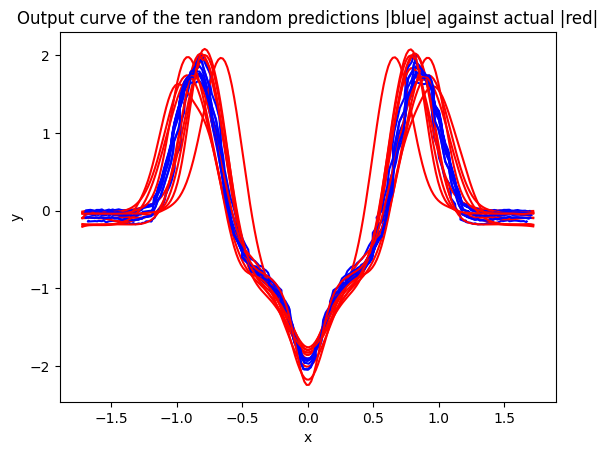

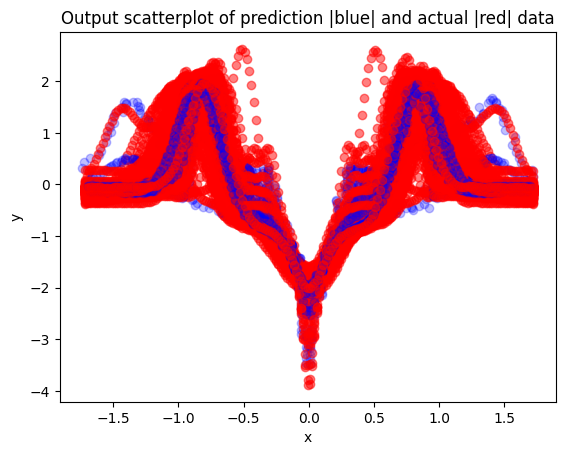

In [16]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(2000, activation="relu")(inputs)
x = layers.Dropout(0.1, seed=42)(x)
x = layers.Dense(1000, activation="relu")(x)
x = layers.Dropout(0.1, seed=42)(x)
x = layers.Dense(500, activation="relu")(x)
x = layers.Dropout(0.1, seed=42)(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss=training_loss)
model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=150),
             TensorBoard(log_dir='model_3_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=64, epochs=1500, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(Loss(test_output_values, model.predict(test_input_values))))
print('')
plots(test_output_values,model.predict(test_input_values))

4/4 [==============================] - 0s 7ms/step


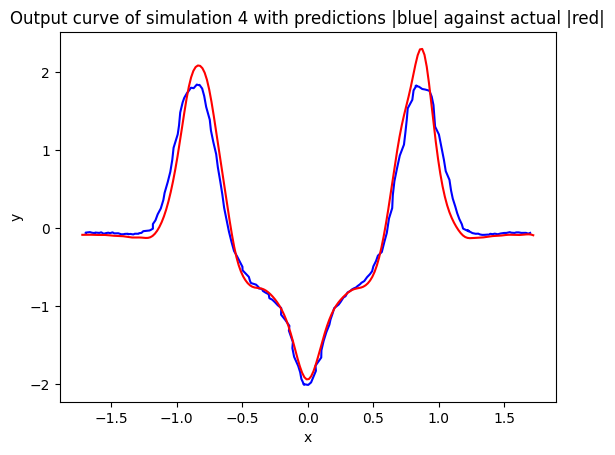

In [42]:
number = 4
prediction = model.predict(test_input_values)
length = int(len(prediction[0])/2)
x_1 = prediction[number][0:length]
y_1 = prediction[number][length:]
plt.plot(x_1,y_1,c='b')

x_2 = test_output_values[number][0:length]
y_2 = test_output_values[number][length:]
plt.plot(x_2,y_2,c='r')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Output curve of simulation ' + str(number) + ' with predictions |blue| against actual |red|')
plt.show() 

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 1000)]            0         
                                                                 
 dense_22 (Dense)            (None, 2000)              2002000   
                                                                 
 batch_normalization_2 (Batc  (None, 2000)             8000      
 hNormalization)                                                 
                                                                 
 dropout_11 (Dropout)        (None, 2000)              0         
                                                                 
 dense_23 (Dense)            (None, 1000)              2001000   
                                                                 
 batch_normalization_3 (Batc  (None, 1000)             4000      
 hNormalization)                                           

7/7 [==============================] - 1s 106ms/step - loss: 1.7742 - val_loss: 1.8400
Epoch 63/1500
7/7 [==============================] - 1s 86ms/step - loss: 1.7235 - val_loss: 2.0414
Epoch 64/1500
7/7 [==============================] - 1s 82ms/step - loss: 1.7441 - val_loss: 1.8806
Epoch 65/1500
7/7 [==============================] - 1s 81ms/step - loss: 1.7214 - val_loss: 1.8401
Epoch 66/1500
7/7 [==============================] - 1s 86ms/step - loss: 1.6876 - val_loss: 1.6986
Epoch 67/1500
7/7 [==============================] - 1s 84ms/step - loss: 1.6247 - val_loss: 1.8842
Epoch 68/1500
7/7 [==============================] - 1s 86ms/step - loss: 1.7163 - val_loss: 1.7249
Epoch 69/1500
7/7 [==============================] - 1s 91ms/step - loss: 1.6733 - val_loss: 1.6611
Epoch 70/1500
7/7 [==============================] - 1s 80ms/step - loss: 1.6306 - val_loss: 1.5447
Epoch 71/1500
7/7 [==============================] - 1s 214ms/step - loss: 1.6751 - val_loss: 1.6099
Epoch 72/150

7/7 [==============================] - 1s 84ms/step - loss: 1.3915 - val_loss: 1.2909
Epoch 144/1500
7/7 [==============================] - 1s 79ms/step - loss: 1.3765 - val_loss: 1.3083
Epoch 145/1500
7/7 [==============================] - 1s 82ms/step - loss: 1.4573 - val_loss: 1.3810
Epoch 146/1500
7/7 [==============================] - 1s 82ms/step - loss: 1.4829 - val_loss: 1.3304
Epoch 147/1500
7/7 [==============================] - 1s 78ms/step - loss: 1.3843 - val_loss: 1.3301
Epoch 148/1500
7/7 [==============================] - 1s 82ms/step - loss: 1.3387 - val_loss: 1.3124
Epoch 149/1500
7/7 [==============================] - 1s 80ms/step - loss: 1.3719 - val_loss: 1.3027
Epoch 150/1500
7/7 [==============================] - 1s 80ms/step - loss: 1.3540 - val_loss: 1.2713
Epoch 151/1500
7/7 [==============================] - 1s 216ms/step - loss: 1.3392 - val_loss: 1.2858
Epoch 152/1500
7/7 [==============================] - 1s 124ms/step - loss: 1.3995 - val_loss: 1.2677
Epo

7/7 [==============================] - 1s 80ms/step - loss: 1.1890 - val_loss: 1.1842
Epoch 225/1500
7/7 [==============================] - 1s 82ms/step - loss: 1.1697 - val_loss: 1.1916
Epoch 226/1500
7/7 [==============================] - 1s 78ms/step - loss: 1.1999 - val_loss: 1.1866
Epoch 227/1500
7/7 [==============================] - 1s 80ms/step - loss: 1.2064 - val_loss: 1.1824
Epoch 228/1500
7/7 [==============================] - 1s 81ms/step - loss: 1.2351 - val_loss: 1.1688
Epoch 229/1500
7/7 [==============================] - 1s 84ms/step - loss: 1.1871 - val_loss: 1.2078
Epoch 230/1500
7/7 [==============================] - 1s 82ms/step - loss: 1.2001 - val_loss: 1.1989
Epoch 231/1500
7/7 [==============================] - 1s 207ms/step - loss: 1.2269 - val_loss: 1.1946
Epoch 232/1500
7/7 [==============================] - 1s 81ms/step - loss: 1.2065 - val_loss: 1.2051
Epoch 233/1500
7/7 [==============================] - 1s 82ms/step - loss: 1.2374 - val_loss: 1.1843
Epoc

7/7 [==============================] - 1s 81ms/step - loss: 1.1523 - val_loss: 1.2600
Epoch 306/1500
7/7 [==============================] - 1s 78ms/step - loss: 1.1740 - val_loss: 1.2743
Epoch 307/1500
7/7 [==============================] - 1s 82ms/step - loss: 1.0868 - val_loss: 1.2779
Epoch 308/1500
7/7 [==============================] - 1s 81ms/step - loss: 1.1061 - val_loss: 1.2668
Epoch 309/1500
7/7 [==============================] - 1s 86ms/step - loss: 1.1053 - val_loss: 1.2397
Epoch 310/1500
7/7 [==============================] - 1s 83ms/step - loss: 1.3205 - val_loss: 1.2294
Epoch 311/1500
7/7 [==============================] - 1s 204ms/step - loss: 1.0793 - val_loss: 1.1978
Epoch 312/1500
7/7 [==============================] - 1s 81ms/step - loss: 1.0964 - val_loss: 1.1471
Epoch 313/1500
7/7 [==============================] - 1s 81ms/step - loss: 1.0922 - val_loss: 1.1392
Epoch 314/1500
7/7 [==============================] - 1s 78ms/step - loss: 1.0945 - val_loss: 1.1294
Epoc

7/7 [==============================] - 1s 82ms/step - loss: 1.0110 - val_loss: 1.1597
Epoch 387/1500
7/7 [==============================] - 1s 84ms/step - loss: 1.0434 - val_loss: 1.1415
Epoch 388/1500
7/7 [==============================] - 1s 79ms/step - loss: 1.0691 - val_loss: 1.1224
Epoch 389/1500
7/7 [==============================] - 1s 80ms/step - loss: 1.0279 - val_loss: 1.1248
Epoch 390/1500
7/7 [==============================] - 1s 81ms/step - loss: 1.1239 - val_loss: 1.1159
Epoch 391/1500
7/7 [==============================] - 1s 208ms/step - loss: 1.0117 - val_loss: 1.1529
Epoch 392/1500
7/7 [==============================] - 1s 84ms/step - loss: 1.0164 - val_loss: 1.1555
Epoch 393/1500
7/7 [==============================] - 1s 81ms/step - loss: 1.0574 - val_loss: 1.1382
Epoch 394/1500
7/7 [==============================] - 1s 78ms/step - loss: 1.0701 - val_loss: 1.1154
Epoch 395/1500
7/7 [==============================] - 1s 81ms/step - loss: 1.0363 - val_loss: 1.1068
Epoc

7/7 [==============================] - 1s 82ms/step - loss: 1.0352 - val_loss: 1.0992
Epoch 468/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.9792 - val_loss: 1.0914
Epoch 469/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.9575 - val_loss: 1.0788
Epoch 470/1500
7/7 [==============================] - 1s 86ms/step - loss: 0.9763 - val_loss: 1.0888
Epoch 471/1500
7/7 [==============================] - 1s 201ms/step - loss: 0.9934 - val_loss: 1.1020
Epoch 472/1500
7/7 [==============================] - 1s 84ms/step - loss: 0.9887 - val_loss: 1.1399
Epoch 473/1500
7/7 [==============================] - 1s 81ms/step - loss: 0.9507 - val_loss: 1.1437
Epoch 474/1500
7/7 [==============================] - 1s 82ms/step - loss: 0.9889 - val_loss: 1.1223
Epoch 475/1500
7/7 [==============================] - 1s 78ms/step - loss: 1.0114 - val_loss: 1.1063
Epoch 476/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.9554 - val_loss: 1.0973
Epoc

7/7 [==============================] - 1s 84ms/step - loss: 0.9978 - val_loss: 1.0816
Epoch 549/1500
7/7 [==============================] - 1s 83ms/step - loss: 0.9214 - val_loss: 1.0688
Epoch 550/1500
7/7 [==============================] - 1s 95ms/step - loss: 0.8887 - val_loss: 1.0830
Epoch 551/1500
7/7 [==============================] - 1s 217ms/step - loss: 0.9355 - val_loss: 1.0953
Epoch 552/1500
7/7 [==============================] - 1s 83ms/step - loss: 0.9739 - val_loss: 1.1199
Epoch 553/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.9421 - val_loss: 1.0797
Epoch 554/1500
7/7 [==============================] - 1s 96ms/step - loss: 0.9459 - val_loss: 1.0608
Epoch 555/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.9381 - val_loss: 1.1048
Epoch 556/1500
7/7 [==============================] - 1s 81ms/step - loss: 1.0135 - val_loss: 1.0906
Epoch 557/1500
7/7 [==============================] - 1s 85ms/step - loss: 0.9100 - val_loss: 1.0563
Epoc

7/7 [==============================] - 1s 79ms/step - loss: 0.8365 - val_loss: 1.0530
Epoch 630/1500
7/7 [==============================] - 1s 81ms/step - loss: 0.8907 - val_loss: 1.0653
Epoch 631/1500
7/7 [==============================] - 1s 201ms/step - loss: 0.8767 - val_loss: 1.0518
Epoch 632/1500
7/7 [==============================] - 1s 88ms/step - loss: 0.9785 - val_loss: 1.0595
Epoch 633/1500
7/7 [==============================] - 1s 87ms/step - loss: 0.9214 - val_loss: 1.0630
Epoch 634/1500
7/7 [==============================] - 1s 89ms/step - loss: 0.8582 - val_loss: 1.0556
Epoch 635/1500
7/7 [==============================] - 1s 82ms/step - loss: 0.8802 - val_loss: 1.0548
Epoch 636/1500
7/7 [==============================] - 1s 234ms/step - loss: 0.8484 - val_loss: 1.0679
Epoch 637/1500
7/7 [==============================] - 1s 78ms/step - loss: 0.8760 - val_loss: 1.0689
Epoch 638/1500
7/7 [==============================] - 1s 85ms/step - loss: 0.8441 - val_loss: 1.0701
Epo

7/7 [==============================] - 1s 83ms/step - loss: 0.8709 - val_loss: 1.0673
Epoch 711/1500
7/7 [==============================] - 1s 210ms/step - loss: 0.8472 - val_loss: 1.0484
Epoch 712/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.9550 - val_loss: 1.0618
Epoch 713/1500
7/7 [==============================] - 1s 83ms/step - loss: 0.9345 - val_loss: 1.0992
Epoch 714/1500
7/7 [==============================] - 1s 82ms/step - loss: 0.8905 - val_loss: 1.1035
Epoch 715/1500
7/7 [==============================] - 1s 83ms/step - loss: 0.8607 - val_loss: 1.1007
Epoch 716/1500
7/7 [==============================] - 1s 81ms/step - loss: 0.8974 - val_loss: 1.1238
Epoch 717/1500
7/7 [==============================] - 1s 82ms/step - loss: 0.9570 - val_loss: 1.1497
Epoch 718/1500
7/7 [==============================] - 1s 83ms/step - loss: 1.0262 - val_loss: 1.1188
Epoch 719/1500
7/7 [==============================] - 1s 81ms/step - loss: 0.9473 - val_loss: 1.0830
Epoc

7/7 [==============================] - 1s 202ms/step - loss: 0.8643 - val_loss: 1.0574
Epoch 792/1500
7/7 [==============================] - 1s 78ms/step - loss: 0.8681 - val_loss: 1.0567
Epoch 793/1500
7/7 [==============================] - 1s 82ms/step - loss: 0.8356 - val_loss: 1.0043
Epoch 794/1500
7/7 [==============================] - 1s 83ms/step - loss: 0.8418 - val_loss: 0.9950
Epoch 795/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.8499 - val_loss: 1.0059
Epoch 796/1500
7/7 [==============================] - 1s 81ms/step - loss: 0.8190 - val_loss: 1.0143
Epoch 797/1500
7/7 [==============================] - 1s 87ms/step - loss: 0.7882 - val_loss: 1.0186
Epoch 798/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.7964 - val_loss: 1.0215
Epoch 799/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.8582 - val_loss: 1.0265
Epoch 800/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.8231 - val_loss: 1.0789
Epoc

7/7 [==============================] - 1s 80ms/step - loss: 0.7752 - val_loss: 1.0434
Epoch 873/1500
7/7 [==============================] - 1s 82ms/step - loss: 0.8184 - val_loss: 1.0703
Epoch 874/1500
7/7 [==============================] - 1s 86ms/step - loss: 0.8445 - val_loss: 1.0530
Epoch 875/1500
7/7 [==============================] - 1s 81ms/step - loss: 0.7608 - val_loss: 1.0443
Epoch 876/1500
7/7 [==============================] - 1s 83ms/step - loss: 0.7950 - val_loss: 1.0755
Epoch 877/1500
7/7 [==============================] - 1s 127ms/step - loss: 0.7968 - val_loss: 1.0610
Epoch 878/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.8010 - val_loss: 1.0556
Epoch 879/1500
7/7 [==============================] - 1s 81ms/step - loss: 0.7940 - val_loss: 1.0440
Epoch 880/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.7686 - val_loss: 1.0392
Epoch 881/1500
7/7 [==============================] - 1s 211ms/step - loss: 0.8232 - val_loss: 1.0389
Epo

7/7 [==============================] - 1s 84ms/step - loss: 0.7553 - val_loss: 1.0117
Epoch 954/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.7502 - val_loss: 1.0250
Epoch 955/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.7556 - val_loss: 1.0552
Epoch 956/1500
7/7 [==============================] - 1s 83ms/step - loss: 0.7971 - val_loss: 1.0695
Epoch 957/1500
7/7 [==============================] - 1s 82ms/step - loss: 0.7758 - val_loss: 1.0505
Epoch 958/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.7728 - val_loss: 0.9964
Epoch 959/1500
7/7 [==============================] - 1s 81ms/step - loss: 0.7926 - val_loss: 1.0081
Epoch 960/1500
7/7 [==============================] - 1s 81ms/step - loss: 0.8246 - val_loss: 1.0158
Epoch 961/1500
7/7 [==============================] - 1s 203ms/step - loss: 0.8109 - val_loss: 1.0135
Epoch 962/1500
7/7 [==============================] - 1s 97ms/step - loss: 0.9351 - val_loss: 1.0301
Epoc

Epoch 1034/1500
7/7 [==============================] - 1s 84ms/step - loss: 0.7877 - val_loss: 1.0256
Epoch 1035/1500
7/7 [==============================] - 1s 81ms/step - loss: 0.7314 - val_loss: 1.0162
Epoch 1036/1500
7/7 [==============================] - 1s 78ms/step - loss: 0.7294 - val_loss: 1.0309
Epoch 1037/1500
7/7 [==============================] - 1s 83ms/step - loss: 0.7581 - val_loss: 0.9924
Epoch 1038/1500
7/7 [==============================] - 1s 82ms/step - loss: 0.7534 - val_loss: 1.0324
Epoch 1039/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.7489 - val_loss: 1.0029
Epoch 1040/1500
7/7 [==============================] - 1s 81ms/step - loss: 0.7765 - val_loss: 1.0699
Epoch 1041/1500
7/7 [==============================] - 1s 210ms/step - loss: 0.7853 - val_loss: 1.0822
Epoch 1042/1500
7/7 [==============================] - 1s 82ms/step - loss: 0.7762 - val_loss: 1.0424
Epoch 1043/1500
7/7 [==============================] - 1s 99ms/step - loss: 0.736

7/7 [==============================] - 1s 84ms/step - loss: 0.8034 - val_loss: 1.0322
Epoch 1115/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.7724 - val_loss: 1.0325
Epoch 1116/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.7835 - val_loss: 1.0563
Epoch 1117/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.7452 - val_loss: 1.0355
Epoch 1118/1500
7/7 [==============================] - 1s 86ms/step - loss: 0.7752 - val_loss: 1.0439
Epoch 1119/1500
7/7 [==============================] - 1s 82ms/step - loss: 0.7793 - val_loss: 1.0420
Epoch 1120/1500
7/7 [==============================] - 1s 84ms/step - loss: 0.8199 - val_loss: 1.0381
Epoch 1121/1500
7/7 [==============================] - 1s 211ms/step - loss: 0.7787 - val_loss: 1.0898
Epoch 1122/1500
7/7 [==============================] - 1s 83ms/step - loss: 0.8183 - val_loss: 1.1506
Epoch 1123/1500
7/7 [==============================] - 1s 86ms/step - loss: 0.8330 - val_loss: 1.

7/7 [==============================] - 1s 80ms/step - loss: 0.7655 - val_loss: 1.0027
Epoch 1195/1500
7/7 [==============================] - 1s 81ms/step - loss: 0.6899 - val_loss: 1.0553
Epoch 1196/1500
7/7 [==============================] - 1s 81ms/step - loss: 0.6908 - val_loss: 1.0695
Epoch 1197/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.7832 - val_loss: 1.0302
Epoch 1198/1500
7/7 [==============================] - 1s 87ms/step - loss: 0.7444 - val_loss: 0.9921
Epoch 1199/1500
7/7 [==============================] - 1s 85ms/step - loss: 0.7083 - val_loss: 0.9577
Epoch 1200/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.7254 - val_loss: 0.9810
Epoch 1201/1500
7/7 [==============================] - 1s 213ms/step - loss: 0.7474 - val_loss: 0.9784
Epoch 1202/1500
7/7 [==============================] - 1s 82ms/step - loss: 0.7482 - val_loss: 0.9706
Epoch 1203/1500
7/7 [==============================] - 1s 82ms/step - loss: 0.7014 - val_loss: 0.

7/7 [==============================] - 1s 82ms/step - loss: 0.7626 - val_loss: 0.9797
Epoch 1275/1500
7/7 [==============================] - 1s 85ms/step - loss: 0.7587 - val_loss: 1.0109
Epoch 1276/1500
7/7 [==============================] - 1s 97ms/step - loss: 0.7133 - val_loss: 0.9992
Epoch 1277/1500
7/7 [==============================] - 1s 83ms/step - loss: 0.7509 - val_loss: 0.9767
Epoch 1278/1500
7/7 [==============================] - 1s 82ms/step - loss: 0.7333 - val_loss: 0.9455
Epoch 1279/1500
7/7 [==============================] - 1s 164ms/step - loss: 0.7174 - val_loss: 0.9469
Epoch 1280/1500
7/7 [==============================] - 1s 165ms/step - loss: 0.6792 - val_loss: 0.9327
Epoch 1281/1500
7/7 [==============================] - 1s 216ms/step - loss: 0.6956 - val_loss: 0.9767
Epoch 1282/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.7118 - val_loss: 0.9636
Epoch 1283/1500
7/7 [==============================] - 1s 90ms/step - loss: 0.6655 - val_loss: 

7/7 [==============================] - 1s 88ms/step - loss: 0.6906 - val_loss: 1.0080
Epoch 1355/1500
7/7 [==============================] - 1s 78ms/step - loss: 0.7517 - val_loss: 1.0214
Epoch 1356/1500
7/7 [==============================] - 1s 81ms/step - loss: 0.7403 - val_loss: 1.0612
Epoch 1357/1500
7/7 [==============================] - 1s 82ms/step - loss: 0.7498 - val_loss: 1.0154
Epoch 1358/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.6760 - val_loss: 0.9989
Epoch 1359/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.7556 - val_loss: 0.9636
Epoch 1360/1500
7/7 [==============================] - 1s 85ms/step - loss: 0.6864 - val_loss: 0.9284
Epoch 1361/1500
7/7 [==============================] - 1s 200ms/step - loss: 0.7476 - val_loss: 0.9464
Epoch 1362/1500
7/7 [==============================] - 1s 233ms/step - loss: 0.6847 - val_loss: 0.9347
Epoch 1363/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.7067 - val_loss: 0

7/7 [==============================] - 1s 81ms/step - loss: 0.6542 - val_loss: 0.9746
Epoch 1435/1500
7/7 [==============================] - 1s 81ms/step - loss: 0.6674 - val_loss: 0.9889
Epoch 1436/1500
7/7 [==============================] - 1s 81ms/step - loss: 0.6648 - val_loss: 1.0719
Epoch 1437/1500
7/7 [==============================] - 1s 84ms/step - loss: 0.7468 - val_loss: 1.0293
Epoch 1438/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.6676 - val_loss: 0.9805
Epoch 1439/1500
7/7 [==============================] - 1s 78ms/step - loss: 0.6644 - val_loss: 0.9708
Epoch 1440/1500
7/7 [==============================] - 1s 84ms/step - loss: 0.6657 - val_loss: 0.9946
Epoch 1441/1500
7/7 [==============================] - 1s 196ms/step - loss: 0.6965 - val_loss: 1.0295
Epoch 1442/1500
7/7 [==============================] - 1s 82ms/step - loss: 0.7858 - val_loss: 0.9860
Epoch 1443/1500
7/7 [==============================] - 1s 86ms/step - loss: 0.6865 - val_loss: 0.

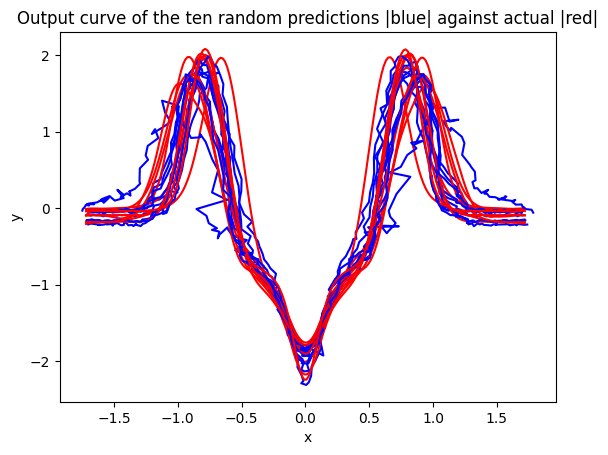

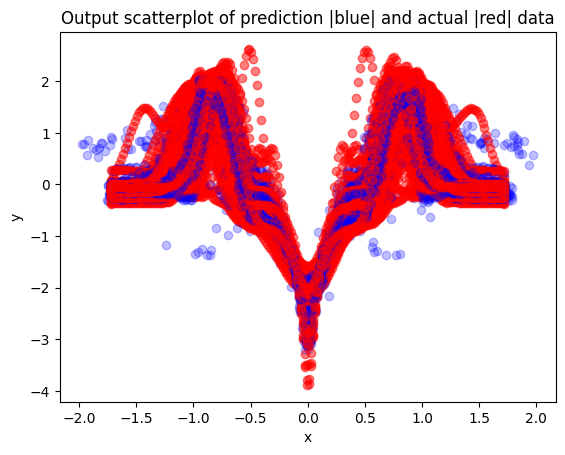

In [45]:
from keras.layers import BatchNormalization

inputs = keras.Input(shape=(1000,))
x = layers.Dense(2000, activation="relu")(inputs)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.1, seed=42)(x)
x = layers.Dense(1000, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.1, seed=42)(x)
x = layers.Dense(500, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.1, seed=42)(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss=training_loss)
model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=150),
             TensorBoard(log_dir='model_3_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=64, epochs=1500, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(Loss(test_output_values, model.predict(test_input_values))))
print('')
plots(test_output_values,model.predict(test_input_values))

4/4 [==============================] - 0s 7ms/step


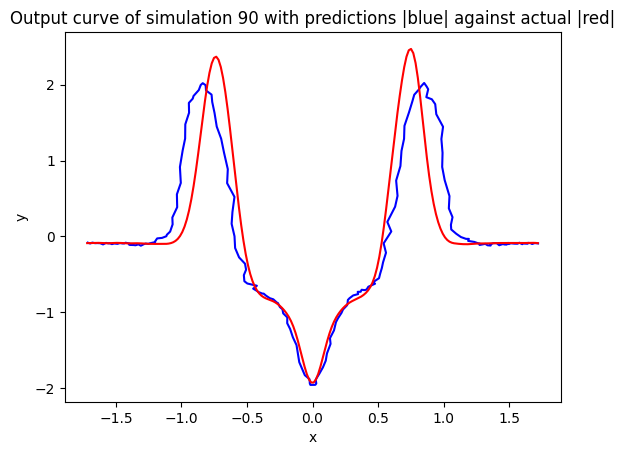

In [64]:
number = 90 # Number six is broken
prediction = model.predict(test_input_values)
length = int(len(prediction[0])/2)
x_1 = prediction[number][0:length]
y_1 = prediction[number][length:]
plt.plot(x_1,y_1,c='b')

x_2 = test_output_values[number][0:length]
y_2 = test_output_values[number][length:]
plt.plot(x_2,y_2,c='r')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Output curve of simulation ' + str(number) + ' with predictions |blue| against actual |red|')
plt.show() 

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 1000)]            0         
                                                                 
 dense_26 (Dense)            (None, 2000)              2002000   
                                                                 
 dropout_14 (Dropout)        (None, 2000)              0         
                                                                 
 batch_normalization_5 (Batc  (None, 2000)             8000      
 hNormalization)                                                 
                                                                 
 dense_27 (Dense)            (None, 500)               1000500   
                                                                 
 batch_normalization_6 (Batc  (None, 500)              2000      
 hNormalization)                                           

7/7 [==============================] - 0s 67ms/step - loss: 1.3489 - val_loss: 1.7972
Epoch 69/1500
7/7 [==============================] - 0s 62ms/step - loss: 1.3059 - val_loss: 1.7023
Epoch 70/1500
7/7 [==============================] - 0s 61ms/step - loss: 1.2678 - val_loss: 1.5988
Epoch 71/1500
7/7 [==============================] - 1s 148ms/step - loss: 1.3495 - val_loss: 1.6725
Epoch 72/1500
7/7 [==============================] - 0s 62ms/step - loss: 1.3200 - val_loss: 1.6641
Epoch 73/1500
7/7 [==============================] - 0s 60ms/step - loss: 1.3013 - val_loss: 1.6116
Epoch 74/1500
7/7 [==============================] - 0s 59ms/step - loss: 1.2609 - val_loss: 1.4516
Epoch 75/1500
7/7 [==============================] - 0s 60ms/step - loss: 1.4224 - val_loss: 1.8941
Epoch 76/1500
7/7 [==============================] - 0s 60ms/step - loss: 1.3330 - val_loss: 1.6413
Epoch 77/1500
7/7 [==============================] - 0s 64ms/step - loss: 1.5728 - val_loss: 2.0107
Epoch 78/1500

7/7 [==============================] - 0s 62ms/step - loss: 1.1210 - val_loss: 1.3473
Epoch 150/1500
7/7 [==============================] - 0s 59ms/step - loss: 1.1868 - val_loss: 1.4245
Epoch 151/1500
7/7 [==============================] - 1s 146ms/step - loss: 1.2941 - val_loss: 1.5258
Epoch 152/1500
7/7 [==============================] - 0s 61ms/step - loss: 1.2281 - val_loss: 1.5839
Epoch 153/1500
7/7 [==============================] - 0s 62ms/step - loss: 1.2917 - val_loss: 1.3918
Epoch 154/1500
7/7 [==============================] - 0s 63ms/step - loss: 1.3234 - val_loss: 1.6768
Epoch 155/1500
7/7 [==============================] - 0s 68ms/step - loss: 1.2728 - val_loss: 1.4269
Epoch 156/1500
7/7 [==============================] - 0s 60ms/step - loss: 1.2442 - val_loss: 1.4268
Epoch 157/1500
7/7 [==============================] - 0s 60ms/step - loss: 1.1708 - val_loss: 1.3431
Epoch 158/1500
7/7 [==============================] - 0s 61ms/step - loss: 1.1940 - val_loss: 1.3985
Epoc

7/7 [==============================] - 1s 207ms/step - loss: 1.1442 - val_loss: 1.3192
Epoch 231/1500
7/7 [==============================] - 2s 390ms/step - loss: 1.1844 - val_loss: 1.4168
Epoch 232/1500
7/7 [==============================] - 0s 59ms/step - loss: 1.0762 - val_loss: 1.2694
Epoch 233/1500
7/7 [==============================] - 0s 62ms/step - loss: 1.1178 - val_loss: 1.3922
Epoch 234/1500
7/7 [==============================] - 0s 64ms/step - loss: 1.0950 - val_loss: 1.2300
Epoch 235/1500
7/7 [==============================] - 0s 58ms/step - loss: 1.1109 - val_loss: 1.4119
Epoch 236/1500
7/7 [==============================] - 0s 60ms/step - loss: 1.0171 - val_loss: 1.1958
Epoch 237/1500
7/7 [==============================] - 3s 524ms/step - loss: 1.1437 - val_loss: 1.4070
Epoch 238/1500
7/7 [==============================] - 2s 314ms/step - loss: 1.0395 - val_loss: 1.2614
Epoch 239/1500
7/7 [==============================] - 3s 443ms/step - loss: 1.1077 - val_loss: 1.3425


Epoch 311/1500
7/7 [==============================] - 1s 147ms/step - loss: 1.0421 - val_loss: 1.2222
Epoch 312/1500
7/7 [==============================] - 0s 60ms/step - loss: 1.0389 - val_loss: 1.2920
Epoch 313/1500
7/7 [==============================] - 0s 65ms/step - loss: 0.9839 - val_loss: 1.1889
Epoch 314/1500
7/7 [==============================] - 0s 60ms/step - loss: 1.0544 - val_loss: 1.2687
Epoch 315/1500
7/7 [==============================] - 0s 67ms/step - loss: 1.0467 - val_loss: 1.2398
Epoch 316/1500
7/7 [==============================] - 0s 60ms/step - loss: 1.0341 - val_loss: 1.3152
Epoch 317/1500
7/7 [==============================] - 0s 61ms/step - loss: 1.0826 - val_loss: 1.3241
Epoch 318/1500
7/7 [==============================] - 0s 65ms/step - loss: 0.9778 - val_loss: 1.1735
Epoch 319/1500
7/7 [==============================] - 0s 59ms/step - loss: 1.0976 - val_loss: 1.3632
Epoch 320/1500
7/7 [==============================] - 0s 62ms/step - loss: 1.2495 - val_lo

Epoch 392/1500
7/7 [==============================] - 0s 62ms/step - loss: 1.0768 - val_loss: 1.2783
Epoch 393/1500
7/7 [==============================] - 1s 117ms/step - loss: 1.0096 - val_loss: 1.1977
Epoch 394/1500
7/7 [==============================] - 1s 121ms/step - loss: 0.9969 - val_loss: 1.2292
Epoch 395/1500
7/7 [==============================] - 1s 140ms/step - loss: 0.9753 - val_loss: 1.1755
Epoch 396/1500
7/7 [==============================] - 3s 445ms/step - loss: 1.0177 - val_loss: 1.2064
Epoch 397/1500
7/7 [==============================] - 1s 206ms/step - loss: 0.9634 - val_loss: 1.2685
Epoch 398/1500
7/7 [==============================] - 2s 308ms/step - loss: 0.9702 - val_loss: 1.1944
Epoch 399/1500
7/7 [==============================] - 2s 249ms/step - loss: 0.9564 - val_loss: 1.2745
Epoch 400/1500
7/7 [==============================] - 2s 313ms/step - loss: 0.9372 - val_loss: 1.2242
Epoch 401/1500
7/7 [==============================] - 4s 721ms/step - loss: 1.0680 

Epoch 473/1500
7/7 [==============================] - 0s 60ms/step - loss: 0.9760 - val_loss: 1.2390
Epoch 474/1500
7/7 [==============================] - 0s 61ms/step - loss: 0.9454 - val_loss: 1.1642
Epoch 475/1500
7/7 [==============================] - 0s 60ms/step - loss: 0.9378 - val_loss: 1.1769
Epoch 476/1500
7/7 [==============================] - 0s 61ms/step - loss: 0.9248 - val_loss: 1.1345
Epoch 477/1500
7/7 [==============================] - 0s 60ms/step - loss: 0.9643 - val_loss: 1.1845
Epoch 478/1500
7/7 [==============================] - 0s 60ms/step - loss: 1.0124 - val_loss: 1.1907
Epoch 479/1500
7/7 [==============================] - 0s 63ms/step - loss: 1.0234 - val_loss: 1.1724
Epoch 480/1500
7/7 [==============================] - 0s 57ms/step - loss: 0.9327 - val_loss: 1.1670
Epoch 481/1500
7/7 [==============================] - 1s 222ms/step - loss: 0.9062 - val_loss: 1.1820
Epoch 482/1500
7/7 [==============================] - 1s 140ms/step - loss: 1.0342 - val_l

Epoch 554/1500
7/7 [==============================] - 3s 475ms/step - loss: 0.9689 - val_loss: 1.1646
Epoch 555/1500
7/7 [==============================] - 3s 519ms/step - loss: 0.9371 - val_loss: 1.2216
Epoch 556/1500
7/7 [==============================] - 1s 238ms/step - loss: 0.9297 - val_loss: 1.1605
Epoch 557/1500
7/7 [==============================] - 2s 303ms/step - loss: 0.9829 - val_loss: 1.1686
Epoch 558/1500
7/7 [==============================] - 2s 294ms/step - loss: 0.9716 - val_loss: 1.1984
Epoch 559/1500
7/7 [==============================] - 2s 318ms/step - loss: 0.9552 - val_loss: 1.1753
Epoch 560/1500
7/7 [==============================] - 1s 229ms/step - loss: 0.9231 - val_loss: 1.1223
Epoch 561/1500
7/7 [==============================] - 7s 1s/step - loss: 0.9227 - val_loss: 1.1580
Epoch 562/1500
7/7 [==============================] - 2s 272ms/step - loss: 0.9776 - val_loss: 1.1489
Epoch 563/1500
7/7 [==============================] - 0s 60ms/step - loss: 0.9165 - v

Epoch 635/1500
7/7 [==============================] - 0s 62ms/step - loss: 0.8863 - val_loss: 1.1492
Epoch 636/1500
7/7 [==============================] - 0s 60ms/step - loss: 0.9338 - val_loss: 1.1307
Epoch 637/1500
7/7 [==============================] - 0s 62ms/step - loss: 1.0150 - val_loss: 1.1659
Epoch 638/1500
7/7 [==============================] - 0s 61ms/step - loss: 0.9318 - val_loss: 1.1415
Epoch 639/1500
7/7 [==============================] - 0s 61ms/step - loss: 0.9279 - val_loss: 1.1435
Epoch 640/1500
7/7 [==============================] - 0s 61ms/step - loss: 0.9246 - val_loss: 1.1689
Epoch 641/1500
7/7 [==============================] - 1s 150ms/step - loss: 0.9451 - val_loss: 1.2374
Epoch 642/1500
7/7 [==============================] - 0s 60ms/step - loss: 0.9674 - val_loss: 1.1529
Epoch 643/1500
7/7 [==============================] - 0s 64ms/step - loss: 0.9976 - val_loss: 1.2125
Epoch 644/1500
7/7 [==============================] - 0s 60ms/step - loss: 0.9864 - val_lo

Epoch 716/1500
7/7 [==============================] - 0s 61ms/step - loss: 0.9816 - val_loss: 1.1148
Epoch 717/1500
7/7 [==============================] - 2s 255ms/step - loss: 0.9047 - val_loss: 1.1037
Epoch 718/1500
7/7 [==============================] - 1s 206ms/step - loss: 0.9690 - val_loss: 1.1003
Epoch 719/1500
7/7 [==============================] - 1s 162ms/step - loss: 0.8606 - val_loss: 1.0870
Epoch 720/1500
7/7 [==============================] - 3s 492ms/step - loss: 0.8511 - val_loss: 1.1144
Epoch 721/1500
7/7 [==============================] - 4s 586ms/step - loss: 0.8836 - val_loss: 1.1023
Epoch 722/1500
7/7 [==============================] - 0s 61ms/step - loss: 0.9356 - val_loss: 1.0995
Epoch 723/1500
7/7 [==============================] - 0s 62ms/step - loss: 0.9166 - val_loss: 1.0983
Epoch 724/1500
7/7 [==============================] - 0s 64ms/step - loss: 0.8706 - val_loss: 1.1282
Epoch 725/1500
7/7 [==============================] - 0s 62ms/step - loss: 0.8528 - va

Epoch 797/1500
7/7 [==============================] - 0s 60ms/step - loss: 0.9178 - val_loss: 1.1404
Epoch 798/1500
7/7 [==============================] - 0s 61ms/step - loss: 0.8953 - val_loss: 1.1276
Epoch 799/1500
7/7 [==============================] - 0s 62ms/step - loss: 0.8641 - val_loss: 1.0787
Epoch 800/1500
7/7 [==============================] - 0s 64ms/step - loss: 0.8695 - val_loss: 1.1168
Epoch 801/1500
7/7 [==============================] - 1s 142ms/step - loss: 0.8966 - val_loss: 1.1475
Epoch 802/1500
7/7 [==============================] - 0s 61ms/step - loss: 0.9110 - val_loss: 1.0987
Epoch 803/1500
7/7 [==============================] - 0s 66ms/step - loss: 0.8493 - val_loss: 1.1025
Epoch 804/1500
7/7 [==============================] - 0s 60ms/step - loss: 0.8842 - val_loss: 1.1544
Epoch 805/1500
7/7 [==============================] - 0s 62ms/step - loss: 0.9435 - val_loss: 1.1227
Epoch 806/1500
7/7 [==============================] - 0s 61ms/step - loss: 0.9279 - val_lo

7/7 [==============================] - 1s 192ms/step - loss: 0.8647 - val_loss: 1.0989
Epoch 879/1500
7/7 [==============================] - 1s 199ms/step - loss: 0.8407 - val_loss: 1.1083
Epoch 880/1500
7/7 [==============================] - 2s 279ms/step - loss: 0.8859 - val_loss: 1.1841
Epoch 881/1500
7/7 [==============================] - 3s 521ms/step - loss: 0.9231 - val_loss: 1.1964
Epoch 882/1500
7/7 [==============================] - 1s 242ms/step - loss: 0.8930 - val_loss: 1.1585
Epoch 883/1500
7/7 [==============================] - 3s 538ms/step - loss: 0.8645 - val_loss: 1.1166
Epoch 884/1500
7/7 [==============================] - 2s 299ms/step - loss: 0.8417 - val_loss: 1.0983
Epoch 885/1500
7/7 [==============================] - 2s 339ms/step - loss: 0.8892 - val_loss: 1.1012
Epoch 886/1500
7/7 [==============================] - 2s 395ms/step - loss: 0.8199 - val_loss: 1.1048
Epoch 887/1500
7/7 [==============================] - 3s 425ms/step - loss: 0.8965 - val_loss: 1.

7/7 [==============================] - 0s 73ms/step - loss: 0.8354 - val_loss: 1.0610
Epoch 960/1500
7/7 [==============================] - 0s 69ms/step - loss: 0.8045 - val_loss: 1.0692
Epoch 961/1500
7/7 [==============================] - 1s 186ms/step - loss: 0.8099 - val_loss: 1.0849
Epoch 962/1500
7/7 [==============================] - 0s 67ms/step - loss: 0.8425 - val_loss: 1.0846
Epoch 963/1500
7/7 [==============================] - 0s 65ms/step - loss: 0.7990 - val_loss: 1.1167
Epoch 964/1500
7/7 [==============================] - 0s 69ms/step - loss: 0.8474 - val_loss: 1.0689
Epoch 965/1500
7/7 [==============================] - 0s 66ms/step - loss: 0.8442 - val_loss: 1.0869
Epoch 966/1500
7/7 [==============================] - 0s 65ms/step - loss: 0.8280 - val_loss: 1.0759
Epoch 967/1500
7/7 [==============================] - 1s 86ms/step - loss: 0.8143 - val_loss: 1.0521
Epoch 968/1500
7/7 [==============================] - 1s 76ms/step - loss: 0.8549 - val_loss: 1.0878
Epoc

7/7 [==============================] - 1s 196ms/step - loss: 0.7888 - val_loss: 1.0502
Epoch 1040/1500
7/7 [==============================] - 1s 191ms/step - loss: 0.7454 - val_loss: 1.0221
Epoch 1041/1500
7/7 [==============================] - 4s 601ms/step - loss: 0.7973 - val_loss: 1.0366
Epoch 1042/1500
7/7 [==============================] - 3s 458ms/step - loss: 0.7973 - val_loss: 1.0486
Epoch 1043/1500
7/7 [==============================] - 5s 745ms/step - loss: 0.7786 - val_loss: 1.0606
Epoch 1044/1500
7/7 [==============================] - 1s 110ms/step - loss: 0.7553 - val_loss: 1.0405
Epoch 1045/1500
7/7 [==============================] - 0s 61ms/step - loss: 0.7799 - val_loss: 1.0521
Epoch 1046/1500
7/7 [==============================] - 0s 60ms/step - loss: 0.8143 - val_loss: 1.0588
Epoch 1047/1500
7/7 [==============================] - 0s 62ms/step - loss: 0.8345 - val_loss: 1.0799
Epoch 1048/1500
7/7 [==============================] - 1s 109ms/step - loss: 0.8069 - val_lo

7/7 [==============================] - 0s 65ms/step - loss: 0.7468 - val_loss: 1.1984
Epoch 1120/1500
7/7 [==============================] - 0s 64ms/step - loss: 0.8082 - val_loss: 1.1985
Epoch 1121/1500
7/7 [==============================] - 1s 166ms/step - loss: 0.7875 - val_loss: 1.1301
Epoch 1122/1500
7/7 [==============================] - 0s 66ms/step - loss: 0.7721 - val_loss: 1.0778
Epoch 1123/1500
7/7 [==============================] - 0s 75ms/step - loss: 0.7232 - val_loss: 1.0638
Epoch 1124/1500
7/7 [==============================] - 1s 76ms/step - loss: 0.7279 - val_loss: 1.0762
Epoch 1125/1500
7/7 [==============================] - 0s 70ms/step - loss: 0.7770 - val_loss: 1.0723
Epoch 1126/1500
7/7 [==============================] - 0s 68ms/step - loss: 0.7887 - val_loss: 1.0584
Epoch 1127/1500
7/7 [==============================] - 0s 60ms/step - loss: 0.8088 - val_loss: 1.0753
Epoch 1128/1500
7/7 [==============================] - 0s 63ms/step - loss: 0.7716 - val_loss: 1.

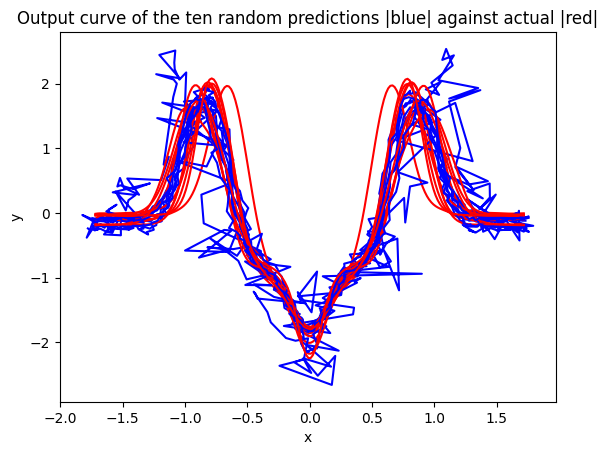

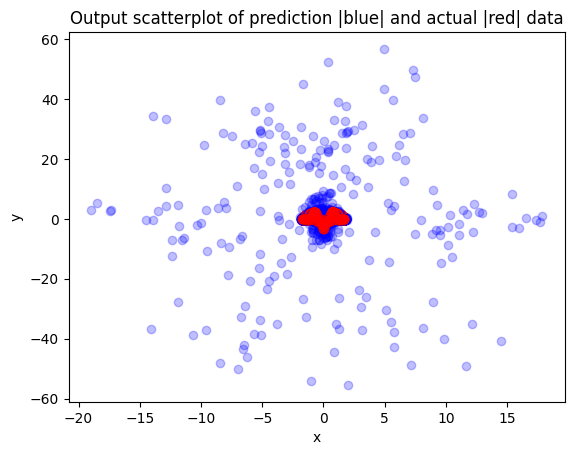

In [65]:
from keras.layers import BatchNormalization

inputs = keras.Input(shape=(1000,))
x = layers.Dense(2000, activation="relu")(inputs)
#x = layers.BatchNormalization()(x)
x = layers.Dropout(0.1, seed=42)(x)
#x = layers.Dense(1000, activation="relu")(x)
x = layers.BatchNormalization()(x)
#x = layers.Dropout(0.1, seed=42)(x)
x = layers.Dense(500, activation="relu")(x)
x = layers.BatchNormalization()(x)
#x = layers.Dropout(0.1, seed=42)(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss=training_loss)
model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=150),
             TensorBoard(log_dir='model_3_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=64, epochs=1500, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(Loss(test_output_values, model.predict(test_input_values))))
print('')
plots(test_output_values,model.predict(test_input_values))

4/4 [==============================] - 0s 6ms/step


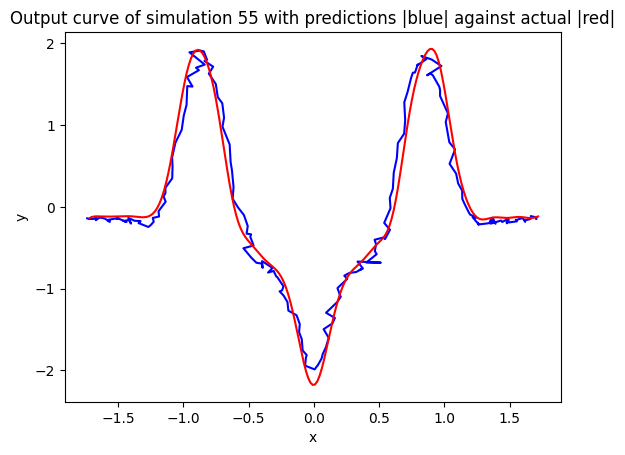

In [70]:
number = 55 # Number six is broken
prediction = model.predict(test_input_values)
length = int(len(prediction[0])/2)
x_1 = prediction[number][0:length]
y_1 = prediction[number][length:]
plt.plot(x_1,y_1,c='b')

x_2 = test_output_values[number][0:length]
y_2 = test_output_values[number][length:]
plt.plot(x_2,y_2,c='r')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Output curve of simulation ' + str(number) + ' with predictions |blue| against actual |red|')
plt.show() 